In [1]:
# import pandas as pd
# import glob


# csv_files = glob.glob('/Users/serdarc/Desktop/ml-zoomcamp/freight_data/*.csv')

# df_list = []

# for filename in csv_files:
#     df = pd.read_csv(filename)
#     df_list.append(df)

# merged_df = pd.concat(df_list, ignore_index=True)
# merged_df.to_csv('freigh_merged.csv', index=False)

In [12]:
import pandas as pd

df= pd.read_csv('/Users/serdarc/Desktop/ml-zoomcamp/midterm_project/freigh_merged.csv')

df

,PASSENGERS,FREIGHT,MAIL,DISTANCE,UNIQUE_CARRIER,UNIQUE_CARRIER_NAME,REGION,CARRIER_GROUP_NEW,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_COUNTRY,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_COUNTRY,YEAR,QUARTER,MONTH,CLASS
0,0.0,0.0,0.0,19.0,KAH,Kenmore Air Harbor,D,6.0,11646,FBS,"Friday Harbor, WA",US,16233,YWH,"Victoria, Canada",CA,2021,3,7,L
1,0.0,0.0,0.0,19.0,KAH,Kenmore Air Harbor,D,6.0,11646,FBS,"Friday Harbor, WA",US,16233,YWH,"Victoria, Canada",CA,2021,3,8,L
2,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,1,F
3,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,2,F
4,0.0,0.0,0.0,37.0,9K,Cape Air,D,6.0,15024,STT,"Charlotte Amalie, VI",US,15598,VIJ,"Virgin Gorda, British Virgin Islands",VG,2021,1,3,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
632122,58192.0,4995617.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12972,LHR,"London, United Kingdom",GB,12478,JFK,"New York, NY",US,2016,2,5,F
632123,59775.0,2643315.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12478,JFK,"New York, NY",US,12972,LHR,"London, United Kingdom",GB,2016,2,5,F
632124,60485.0,2719677.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12478,JFK,"New York, NY",US,12972,LHR,"London, United Kingdom",GB,2016,2,6,F
632125,61057.0,4903648.0,0.0,3451.0,BA,British Airways Plc,I,0.0,12972,LHR,"London, United Kingdom",GB,12478,JFK,"New York, NY",US,2016,3,7,F


In [13]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [14]:
df.year.value_counts().head()

year
2015    72244
2017    72016
2018    71125
2023    70236
2016    69929
Name: count, dtype: int64

In [15]:
df['class'].value_counts()

class
F    427205
L     84035
G     74791
P     46096
Name: count, dtype: int64

In [16]:
print(df.columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'unique_carrier_name', 'region', 'carrier_group_new',
       'origin_airport_id', 'origin', 'origin_city_name', 'origin_country',
       'dest_airport_id', 'dest', 'dest_city_name', 'dest_country', 'year',
       'quarter', 'month', 'class'],
      dtype='object')


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632127 entries, 0 to 632126
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   passengers           632127 non-null  float64
 1   freight              632127 non-null  float64
 2   mail                 632127 non-null  float64
 3   distance             632127 non-null  float64
 4   unique_carrier       631955 non-null  object 
 5   unique_carrier_name  631955 non-null  object 
 6   region               631955 non-null  object 
 7   carrier_group_new    631955 non-null  float64
 8   origin_airport_id    632127 non-null  int64  
 9   origin               632127 non-null  object 
 10  origin_city_name     632127 non-null  object 
 11  origin_country       632125 non-null  object 
 12  dest_airport_id      632127 non-null  int64  
 13  dest                 632127 non-null  object 
 14  dest_city_name       632127 non-null  object 
 15  dest_country     

In [18]:
df.isna().sum()

passengers               0
freight                  0
mail                     0
distance                 0
unique_carrier         172
unique_carrier_name    172
region                 172
carrier_group_new      172
origin_airport_id        0
origin                   0
origin_city_name         0
origin_country           2
dest_airport_id          0
dest                     0
dest_city_name           0
dest_country             2
year                     0
quarter                  0
month                    0
class                    0
dtype: int64

### Rows of columns with null values

In [19]:

columns_with_nulls = df.columns[df.isna().any()]  # Get columns with nulls
df_with_nulls = df[df[columns_with_nulls].isna().any(axis=1)]

# Display the rows with nulls
df_with_nulls

,passengers,freight,mail,distance,unique_carrier,unique_carrier_name,region,carrier_group_new,origin_airport_id,origin,origin_city_name,origin_country,dest_airport_id,dest,dest_city_name,dest_country,year,quarter,month,class
168365,0.0,11673.0,0.0,8143.0,2GQ,Cavok Air LLC,I,0.0,12266,IAH,"Houston, TX",US,15875,WVB,"Walvis Bay, Namibia",NaN,2023,2,6,P
237525,0.0,20258.0,0.0,8143.0,2GQ,Cavok Air LLC,I,0.0,12266,IAH,"Houston, TX",US,15875,WVB,"Walvis Bay, Namibia",NaN,2024,1,1,P
297613,50.0,0.0,0.0,186.0,NaN,NaN,NaN,NaN,10621,BIM,"Bimini, The Bahamas",BS,13360,MLB,"Melbourne, FL",US,2018,1,1,F
298697,80.0,0.0,0.0,186.0,NaN,NaN,NaN,NaN,13360,MLB,"Melbourne, FL",US,10621,BIM,"Bimini, The Bahamas",BS,2018,1,1,F
300655,165.0,0.0,0.0,1074.0,NaN,NaN,NaN,NaN,11618,EWR,"Newark, NJ",US,10621,BIM,"Bimini, The Bahamas",BS,2018,1,1,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484080,8366.0,0.0,0.0,235.0,NaN,NaN,NaN,NaN,12073,HAV,"Havana, Cuba",CU,13303,MIA,"Miami, FL",US,2015,1,1,L
485337,9368.0,0.0,0.0,235.0,NaN,NaN,NaN,NaN,12073,HAV,"Havana, Cuba",CU,13303,MIA,"Miami, FL",US,2015,2,4,L
486619,10869.0,0.0,0.0,235.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,12073,HAV,"Havana, Cuba",CU,2015,1,3,L
486762,11113.0,0.0,0.0,235.0,NaN,NaN,NaN,NaN,12073,HAV,"Havana, Cuba",CU,13303,MIA,"Miami, FL",US,2015,1,3,L


In [20]:
df_with_nulls.iloc[10:20,:]

,passengers,freight,mail,distance,unique_carrier,unique_carrier_name,region,carrier_group_new,origin_airport_id,origin,origin_city_name,origin_country,dest_airport_id,dest,dest_city_name,dest_country,year,quarter,month,class
418040,0.0,0.0,0.0,184.0,NaN,NaN,NaN,NaN,13605,NAS,"Nassau, The Bahamas",BS,13303,MIA,"Miami, FL",US,2015,2,4,L
418115,0.0,0.0,0.0,228.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,14924,SNU,"Santa Clara, Cuba",CU,2015,1,1,L
418117,0.0,0.0,0.0,230.0,NaN,NaN,NaN,NaN,14849,SKB,"St. Kitts, Saint Kitts and Nevis",KN,14843,SJU,"San Juan, PR",US,2015,1,2,L
418125,0.0,0.0,0.0,251.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,10954,CFG,"Cienfuegos, Cuba",CU,2015,1,1,L
418171,0.0,0.0,0.0,317.0,NaN,NaN,NaN,NaN,11907,GGT,"Moss Town, The Bahamas",BS,13303,MIA,"Miami, FL",US,2015,1,2,L
418172,0.0,0.0,0.0,317.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,11907,GGT,"Moss Town, The Bahamas",BS,2015,1,3,L
418187,0.0,0.0,0.0,339.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,11075,CMW,"Camaguey, Cuba",CU,2015,1,1,L
418340,0.0,0.0,0.0,491.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,14722,SCU,"Santiago, Cuba",CU,2015,1,1,L
418537,0.0,0.0,0.0,682.0,NaN,NaN,NaN,NaN,13303,MIA,"Miami, FL",US,13306,MID,"Merida, Mexico",MX,2015,1,1,L
418538,0.0,0.0,0.0,682.0,NaN,NaN,NaN,NaN,13306,MID,"Merida, Mexico",MX,13303,MIA,"Miami, FL",US,2015,1,1,L


In [21]:
df_with_nulls.passengers.sum()

91218.0

In [22]:
df_with_nulls.freight.sum()

31931.0

In [23]:
df = df.dropna()

# Display the cleaned DataFrame
df.isnull().sum()

passengers             0
freight                0
mail                   0
distance               0
unique_carrier         0
unique_carrier_name    0
region                 0
carrier_group_new      0
origin_airport_id      0
origin                 0
origin_city_name       0
origin_country         0
dest_airport_id        0
dest                   0
dest_city_name         0
dest_country           0
year                   0
quarter                0
month                  0
class                  0
dtype: int64


Passenger and Freight Distribution for TK by Year:

 year  passengers     freight  mail
 2015   1621374.0 102453208.0   0.0
 2016   1954340.0 178200900.0   0.0
 2017   1912414.0 191112769.0   0.0
 2018   2093002.0 251028648.0   0.0
 2019   1958037.0 235892260.0   0.0
 2020    851929.0 213990978.0   0.0
 2021   1776613.0 348613709.0   0.0
 2022   3035355.0 389156910.0   0.0
 2023   3420650.0 339882805.0   0.0
 2024   2125585.0 255331582.0   0.0


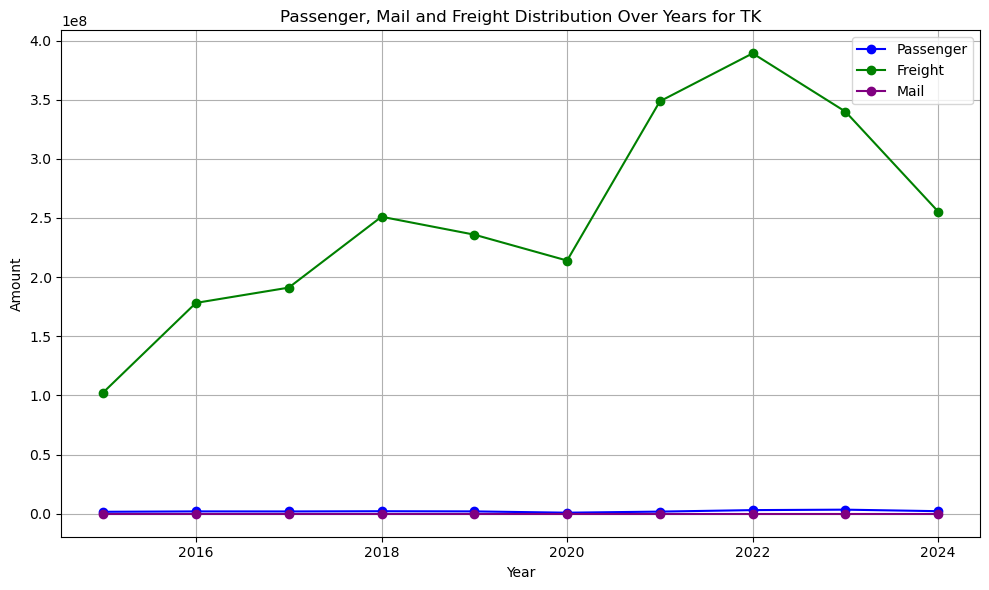

In [24]:
import matplotlib.pyplot as plt


data = df.dropna(subset=['unique_carrier', 'year', 'passengers', 'freight','mail'])


carrier_name = 'TK'  # Replace with the actual carrier name


carrier_data = data[data['unique_carrier'] == carrier_name]


grouped_data = carrier_data.groupby('year')[['passengers', 'freight','mail']].sum().reset_index()


print(f"\nPassenger and Freight Distribution for {carrier_name} by Year:\n")
print(grouped_data.to_string(index=False))


plt.figure(figsize=(10, 6))

# Plot Passenger Data
plt.plot(grouped_data['year'], grouped_data['passengers'], marker='o', linestyle='-', color='blue', label='Passenger')

# Plot Freight Data
plt.plot(grouped_data['year'], grouped_data['freight'], marker='o', linestyle='-', color='green', label='Freight')

plt.plot(grouped_data['year'], grouped_data['mail'], marker='o', linestyle='-', color='purple', label='Mail')

# Add Titles and Labels
plt.title(f"Passenger, Mail and Freight Distribution Over Years for {carrier_name}")
plt.xlabel('Year')
plt.ylabel('Amount')

# Add Legend and Grid
plt.legend()
plt.grid(True)

# Display the Plot
plt.tight_layout()
plt.show()


Passenger, Freight, and Mail Distribution for TK by Year:

 year  passengers     freight  mail
 2015   1621374.0 102453208.0   0.0
 2016   1954340.0 178200900.0   0.0
 2017   1912414.0 191112769.0   0.0
 2018   2093002.0 251028648.0   0.0
 2019   1958037.0 235892260.0   0.0
 2020    851929.0 213990978.0   0.0
 2021   1776613.0 348613709.0   0.0
 2022   3035355.0 389156910.0   0.0
 2023   3420650.0 339882805.0   0.0
 2024   2125585.0 255331582.0   0.0


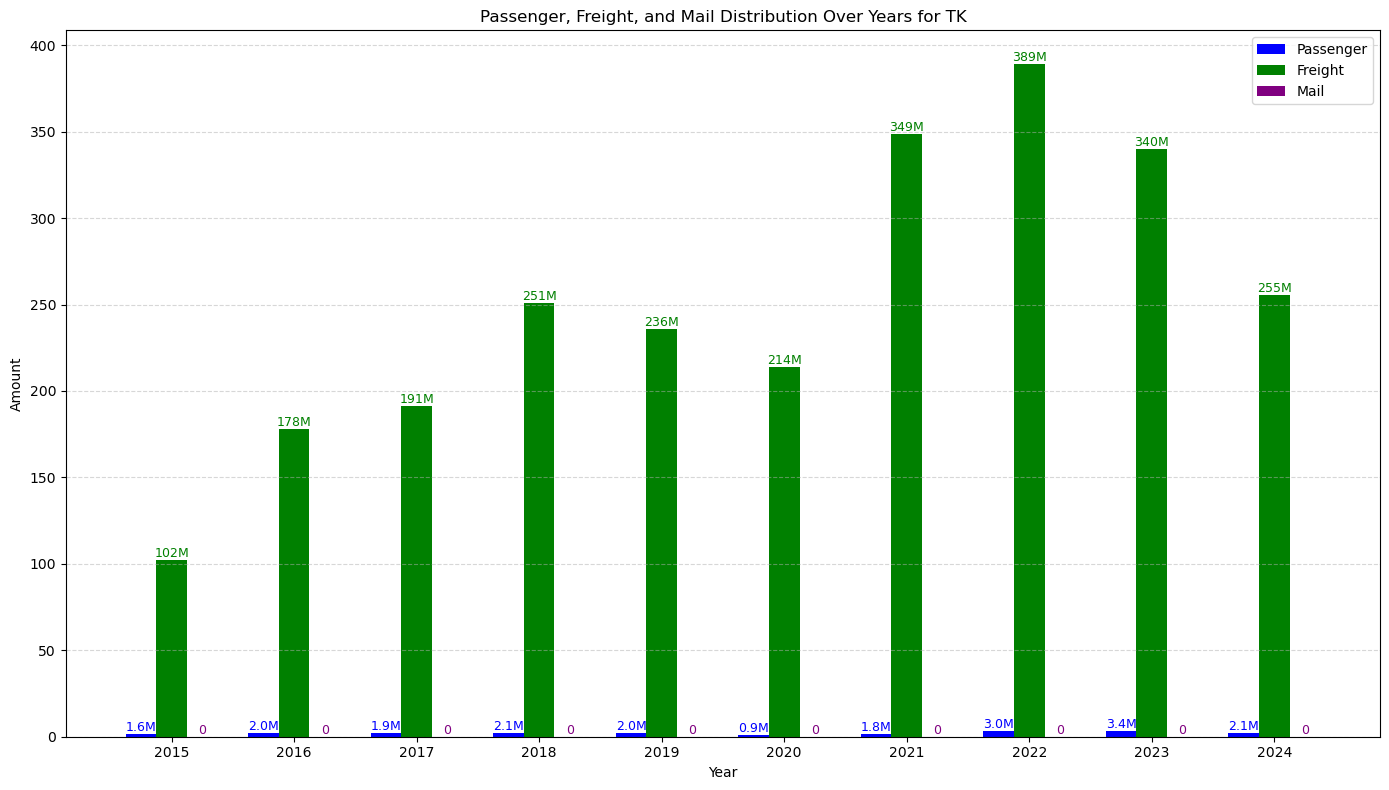

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ensure your data is properly cleaned
data = df.dropna(subset=['unique_carrier', 'year', 'passengers', 'freight', 'mail'])

# Filter data for the specific carrier
carrier_name = 'TK'  # Replace with the actual carrier name
carrier_data = data[data['unique_carrier'] == carrier_name]

# Group data by year and aggregate passenger, freight, and mail
grouped_data = carrier_data.groupby('year')[['passengers', 'freight', 'mail']].sum().reset_index()

print(f"\nPassenger, Freight, and Mail Distribution for {carrier_name} by Year:\n")
print(grouped_data.to_string(index=False))

# Scale down the values for visualization
grouped_data['passengers_scaled'] = grouped_data['passengers'] / 1_000_000  # Display in millions
grouped_data['freight_scaled'] = grouped_data['freight'] / 1_000_000  # Display in millions

# Create a grouped bar chart
positions = np.arange(len(grouped_data['year']))
bar_width = 0.25

fig, ax1 = plt.subplots(figsize=(14, 8))

# Plot Passenger Data (scaled)
bars1 = ax1.bar(positions - bar_width, grouped_data['passengers_scaled'], width=bar_width, color='blue', label='Passenger')
for bar in bars1:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.1f}M', ha='center', va='bottom', fontsize=9, color='blue')

# Plot Freight Data (scaled)
bars2 = ax1.bar(positions, grouped_data['freight_scaled'], width=bar_width, color='green', label='Freight')
for bar in bars2:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}M', ha='center', va='bottom', fontsize=9, color='green')

# Plot Mail Data (unscaled)
bars3 = ax1.bar(positions + bar_width, grouped_data['mail'], width=bar_width, color='purple', label='Mail')
for bar in bars3:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.0f}', ha='center', va='bottom', fontsize=9, color='purple')

# Add titles and labels
ax1.set_title(f"Passenger, Freight, and Mail Distribution Over Years for {carrier_name}")
ax1.set_xlabel('Year')
ax1.set_ylabel('Amount')
ax1.set_xticks(positions)
ax1.set_xticklabels(grouped_data['year'].astype(int))

# Add legend and grid
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.5)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()
plt.savefig('../pics/TK.png')

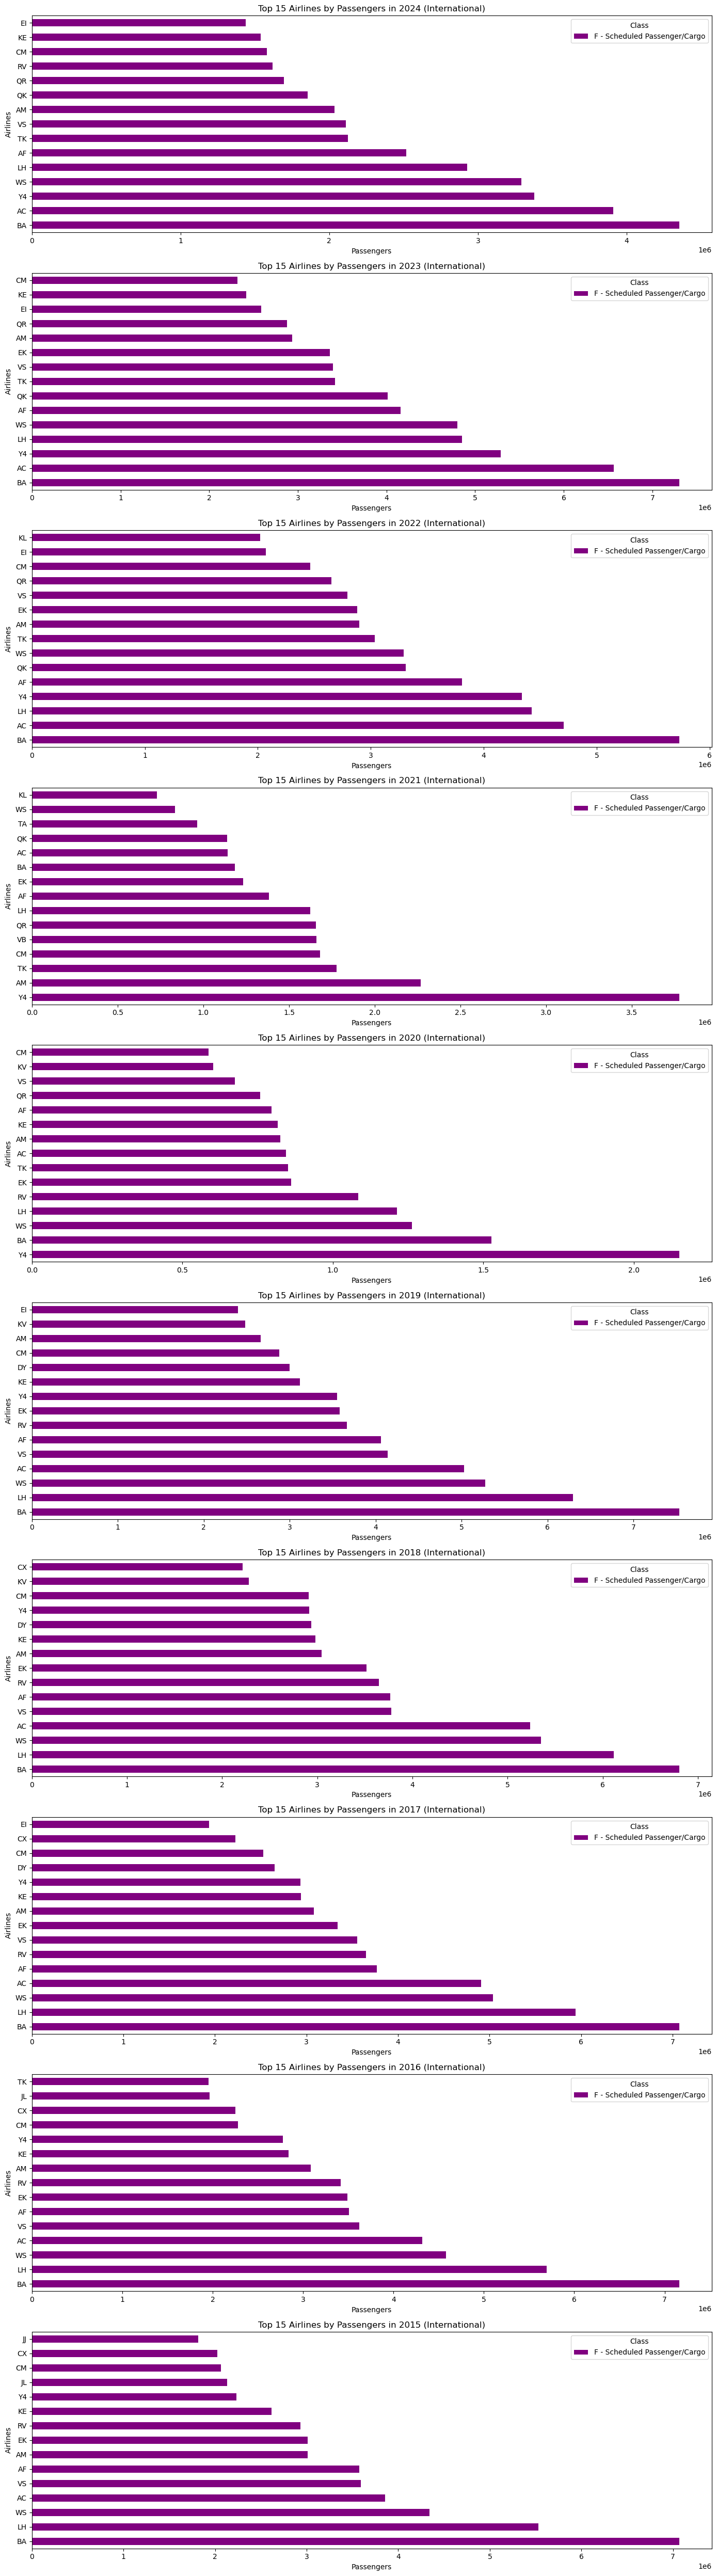

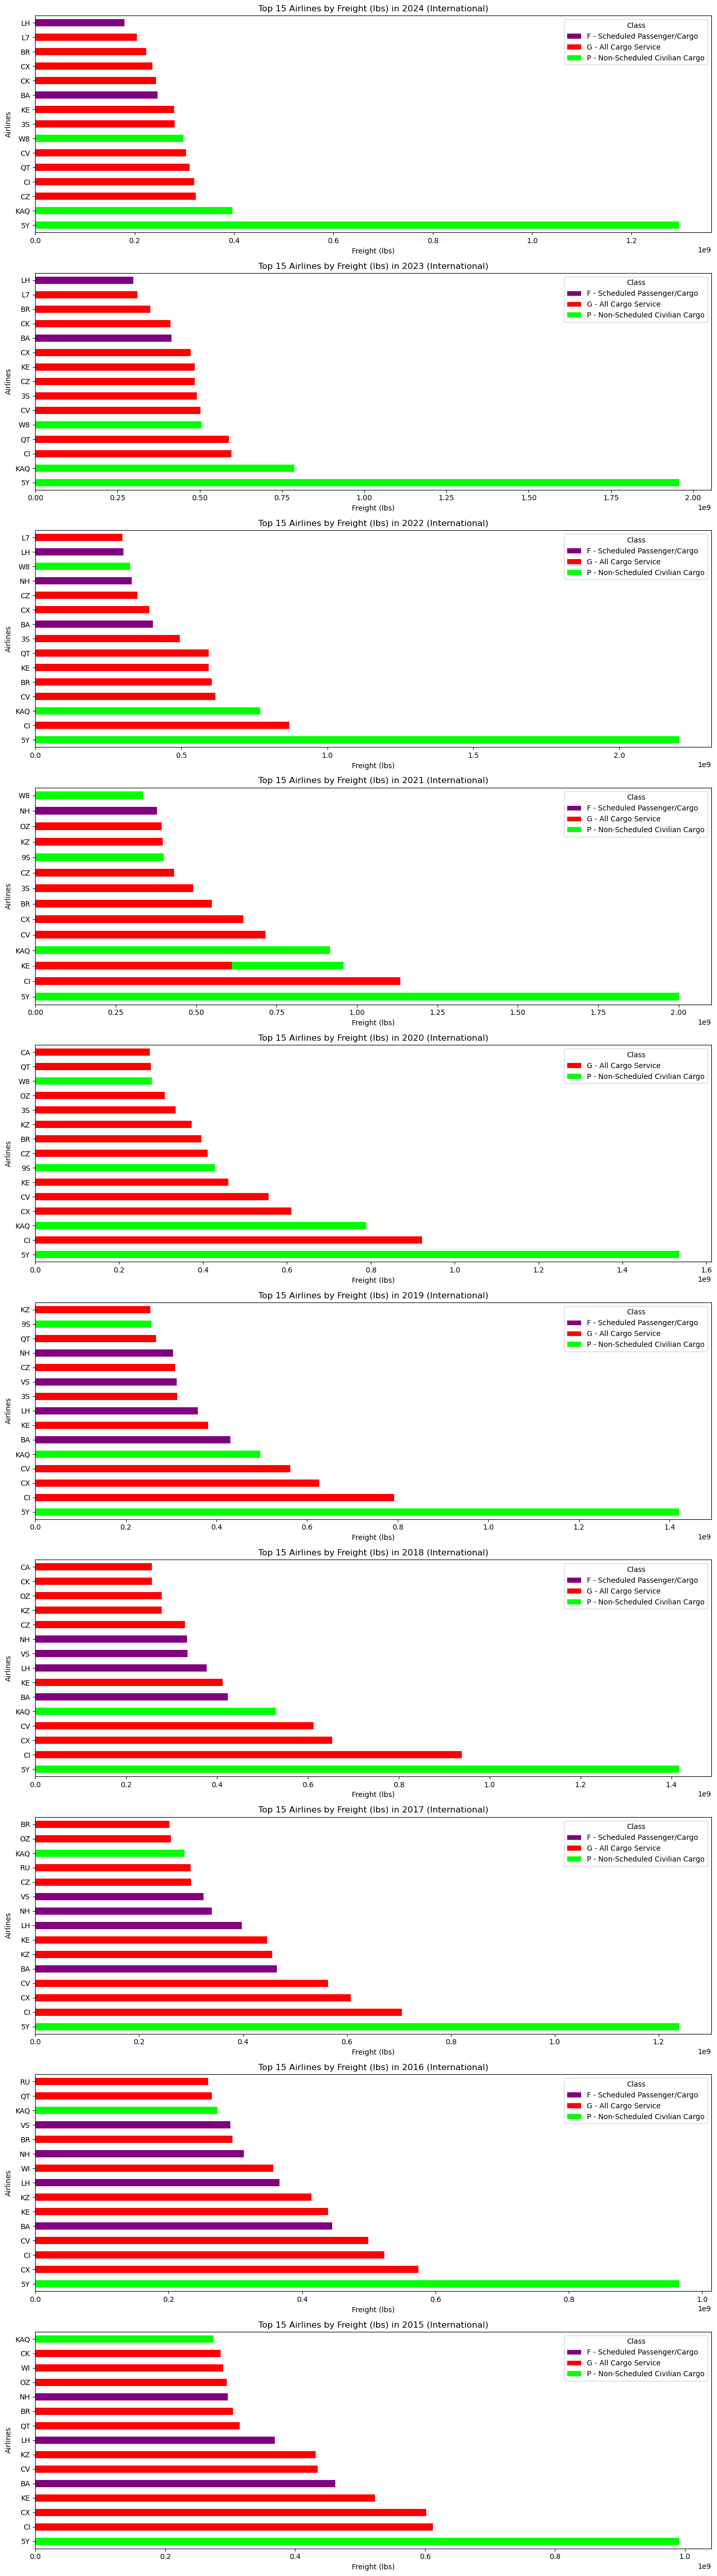

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your data is properly cleaned and filtered
data = df.dropna(subset=['unique_carrier', 'year', 'passengers', 'freight', 'class', 'region'])
data = data[data['region'] == 'I']  # Filter for international flights only

# Group by year, unique carrier, and class to sum passengers and freight
grouped_data = data.groupby(['year', 'unique_carrier', 'class'])[['passengers', 'freight']].sum().reset_index()

# Class descriptions for labeling
class_descriptions = {
    'A': 'Scheduled First Class',
    'C': 'Scheduled Coach',
    'E': 'Mixed First & Coach',
    'F': 'Scheduled Passenger/Cargo',
    'G': 'All Cargo Service',
    'H': 'Humane Reason Unscheduled',
    'K': 'Scheduled Service K',
    'L': 'Non-Scheduled Civilian',
    'N': 'Non-Scheduled Military',
    'P': 'Non-Scheduled Civilian Cargo',
    'Q': 'Non-Scheduled Other Services',
    'R': 'Non-Scheduled Military Cargo',
    'V': 'Non-Scheduled Service V',
    'Z': 'All Services Z'
}

# Function to plot top 15 airlines by year for passengers and freight with class as stack
def plot_top_15_stacked(data, column, title, color_map,save_path):
    # Sort the data for each year and take the top 15 based on the total column value
    top_15 = data.sort_values(by=[column], ascending=False).groupby('year').head(15)
    
    # Sort the unique years in descending order (from most recent to oldest)
    unique_years = sorted(top_15['year'].unique(), reverse=True)
    
    fig, axes = plt.subplots(len(unique_years), 1, figsize=(14, len(unique_years) * 5))
    
    for i, year in enumerate(unique_years):
        ax = axes[i] if len(unique_years) > 1 else axes
        year_data = top_15[top_15['year'] == year]
        
        # Pivot the data to create stacks for each class
        year_pivot = year_data.pivot(index='unique_carrier', columns='class', values=column).fillna(0)
        
        # Sort carriers by total column values for a clean display
        year_pivot['Total'] = year_pivot.sum(axis=1)
        year_pivot = year_pivot.sort_values(by='Total', ascending=False).drop('Total', axis=1)
        
        # Plot stacked bar chart
        year_pivot.plot(kind='barh', stacked=True, ax=ax, color=[color_map.get(cls, 'gray') for cls in year_pivot.columns])
        ax.set_title(f"Top 15 Airlines by {title} in {year} (International)")
        ax.set_xlabel(title)
        ax.set_ylabel('Airlines')
        ax.legend([f"{cls} - {class_descriptions.get(cls, 'Unknown')}" for cls in year_pivot.columns], title='Class')
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Define colors for different classes
class_colors = {
    'A': 'blue',
    'C': 'green',
    'E': 'orange',
    'F': 'purple',
    'G': 'red',
    'H': 'brown',
    'K': 'cyan',
    'L': 'magenta',
    'N': 'yellow',
    'P': 'lime',
    'Q': 'pink',
    'R': 'teal',
    'V': 'navy',
    'Z': 'olive'
}

# Plot for Passengers
plot_top_15_stacked(grouped_data, 'passengers', 'Passengers', class_colors,'../pics/top_airlines_by_passenger.png')

# Plot for Freight
plot_top_15_stacked(grouped_data, 'freight', 'Freight (lbs)', class_colors,'../pics/top_airlines_by_cargo.png')

In [51]:
print(df.columns)

Index(['passengers', 'freight', 'mail', 'distance', 'unique_carrier',
       'unique_carrier_name', 'region', 'carrier_group_new',
       'origin_airport_id', 'origin', 'origin_city_name', 'origin_country',
       'dest_airport_id', 'dest', 'dest_city_name', 'dest_country', 'year',
       'quarter', 'month', 'class'],
      dtype='object')


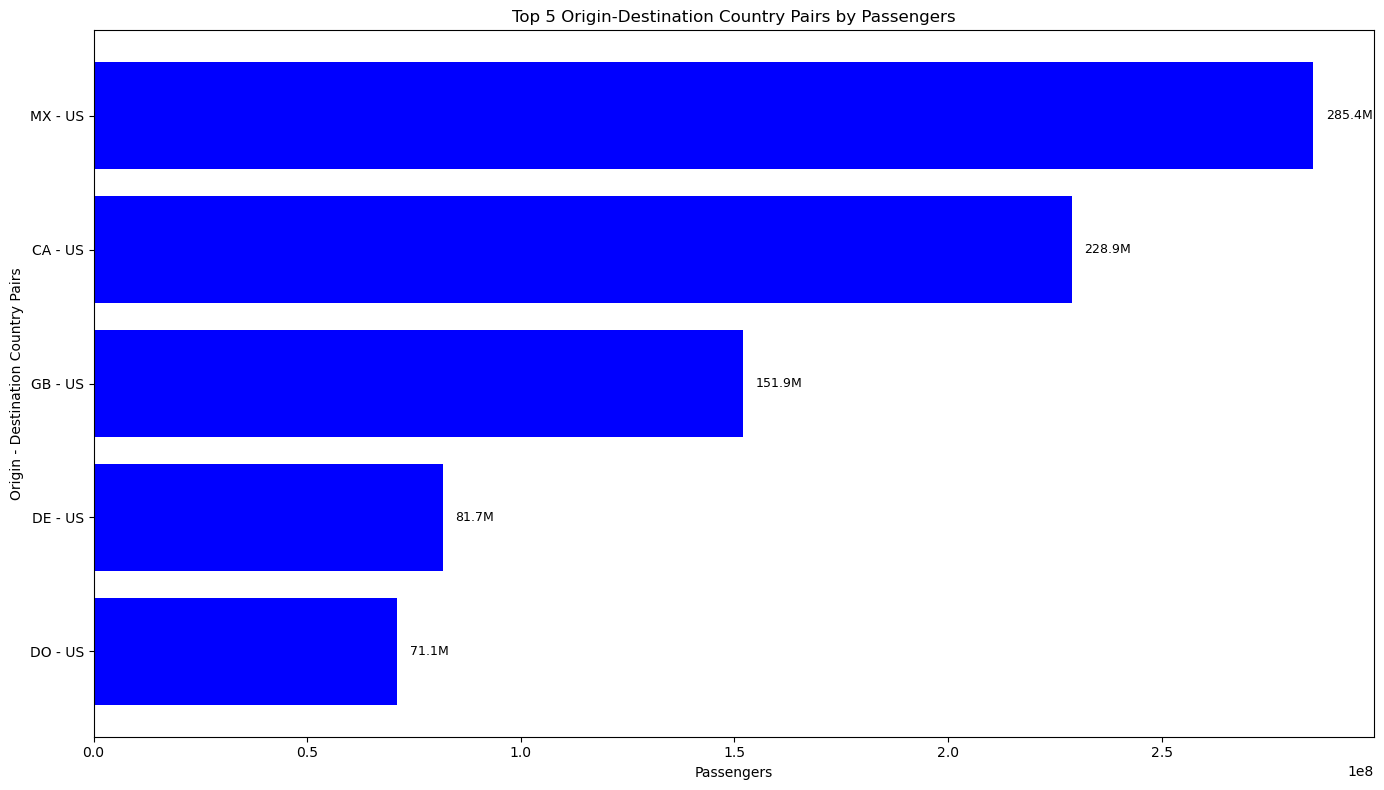

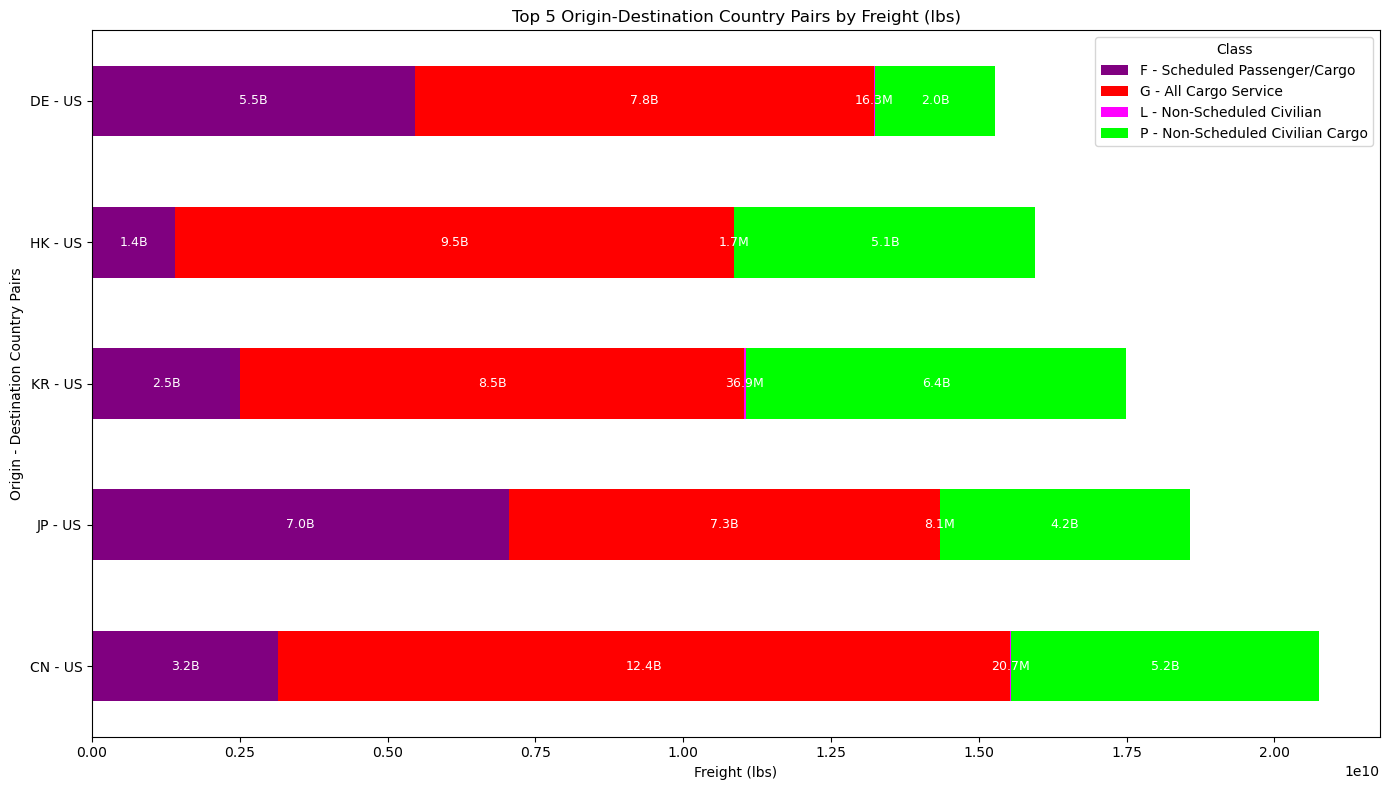

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your data is properly cleaned and filtered
data = df.dropna(subset=['origin_country', 'dest_country', 'passengers', 'freight', 'class']).copy()

# Safely create a consistent representation for origin-destination pairs
data['od_pair'] = data.apply(lambda x: ' - '.join(sorted([x['origin_country'], x['dest_country']])), axis=1)

# Group data by the new origin-destination pair and class to sum passengers and freight
grouped_data = data.groupby(['od_pair', 'class'])[['passengers', 'freight']].sum().reset_index()

# Class descriptions for labeling
class_descriptions = {
    'A': 'Scheduled First Class',
    'C': 'Scheduled Coach',
    'E': 'Mixed First & Coach',
    'F': 'Scheduled Passenger/Cargo',
    'G': 'All Cargo Service',
    'H': 'Humane Reason Unscheduled',
    'K': 'Scheduled Service K',
    'L': 'Non-Scheduled Civilian',
    'N': 'Non-Scheduled Military',
    'P': 'Non-Scheduled Civilian Cargo',
    'Q': 'Non-Scheduled Other Services',
    'R': 'Non-Scheduled Military Cargo',
    'V': 'Non-Scheduled Service V',
    'Z': 'All Services Z'
}

# Function to format numbers as shortened strings
def format_number(num):
    if num >= 1_000_000_000:
        return f'{num / 1_000_000_000:.1f}B'
    elif num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return str(num)

# Function to plot top 5 origin-destination pairs by a given column
def plot_top_5_od_pairs(data, column, title, color, save_path,include_class=False):
    # Group by origin-destination pair to get the top 5 overall (without class)
    if include_class:
        top_5_pairs = data.groupby(['od_pair'])[column].sum().reset_index()
        top_5_pairs = top_5_pairs.sort_values(by=column, ascending=False).head(5)
        
        # Filter the original data to include only the top 5 pairs
        data = data[data['od_pair'].isin(top_5_pairs['od_pair'])]
    
    else:
        top_5_pairs = (
            data.groupby(['od_pair'])[[column]]
            .sum()
            .reset_index()
            .sort_values(by=column, ascending=False)
            .head(5)
        )

    # Plot a horizontal bar chart
    fig, ax = plt.subplots(figsize=(14, 8))
    
    if include_class:
        # Pivot the data to create stacks for each class
        top_5_pivot = data.pivot(index='od_pair', columns='class', values=column).fillna(0)
        top_5_pivot['Total'] = top_5_pivot.sum(axis=1)
        top_5_pivot = top_5_pivot.sort_values(by='Total', ascending=False).drop('Total', axis=1)
        
        # Plot stacked bar chart
        bars = top_5_pivot.plot(kind='barh', stacked=True, ax=ax, color=color)
        
        # Add numbers on the bars, formatted as shortened strings
        for container in ax.containers:
            labels = [format_number(v) if v > 0 else '' for v in container.datavalues]
            ax.bar_label(container, labels=labels, label_type='center', fontsize=9, color='white')
    
        # Update legend with explanations
        ax.legend([f"{cls} - {class_descriptions.get(cls, 'Unknown')}" for cls in top_5_pivot.columns], title='Class')
    
    else:
        top_5_pairs = top_5_pairs.sort_values(by=column, ascending=True)
        bars = ax.barh(top_5_pairs['od_pair'], top_5_pairs[column], color=color)
        
        # Add numbers on the bars, formatted as shortened strings
        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.01 * ax.get_xlim()[1], bar.get_y() + bar.get_height()/2, format_number(width), va='center', fontsize=9, color='black')
    
    ax.set_title(f"Top 5 Origin-Destination Country Pairs by {title}")
    ax.set_xlabel(title)
    ax.set_ylabel('Origin - Destination Country Pairs')
    
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

# Define colors for different classes
class_colors = {
    'A': 'blue',
    'C': 'green',
    'E': 'orange',
    'F': 'purple',
    'G': 'red',
    'H': 'brown',
    'K': 'cyan',
    'L': 'magenta',
    'N': 'yellow',
    'P': 'lime',
    'Q': 'pink',
    'R': 'teal',
    'V': 'navy',
    'Z': 'olive'
}

# Plot for Passengers
plot_top_5_od_pairs(grouped_data, 'passengers', 'Passengers', 'blue','../pics/top_5_pass_O&D_pairs.png')

# Plot for Freight with classes and explanations
plot_top_5_od_pairs(grouped_data, 'freight', 'Freight (lbs)', class_colors, '../pics/top_5_freight_O&D_pairs.png', include_class=True)


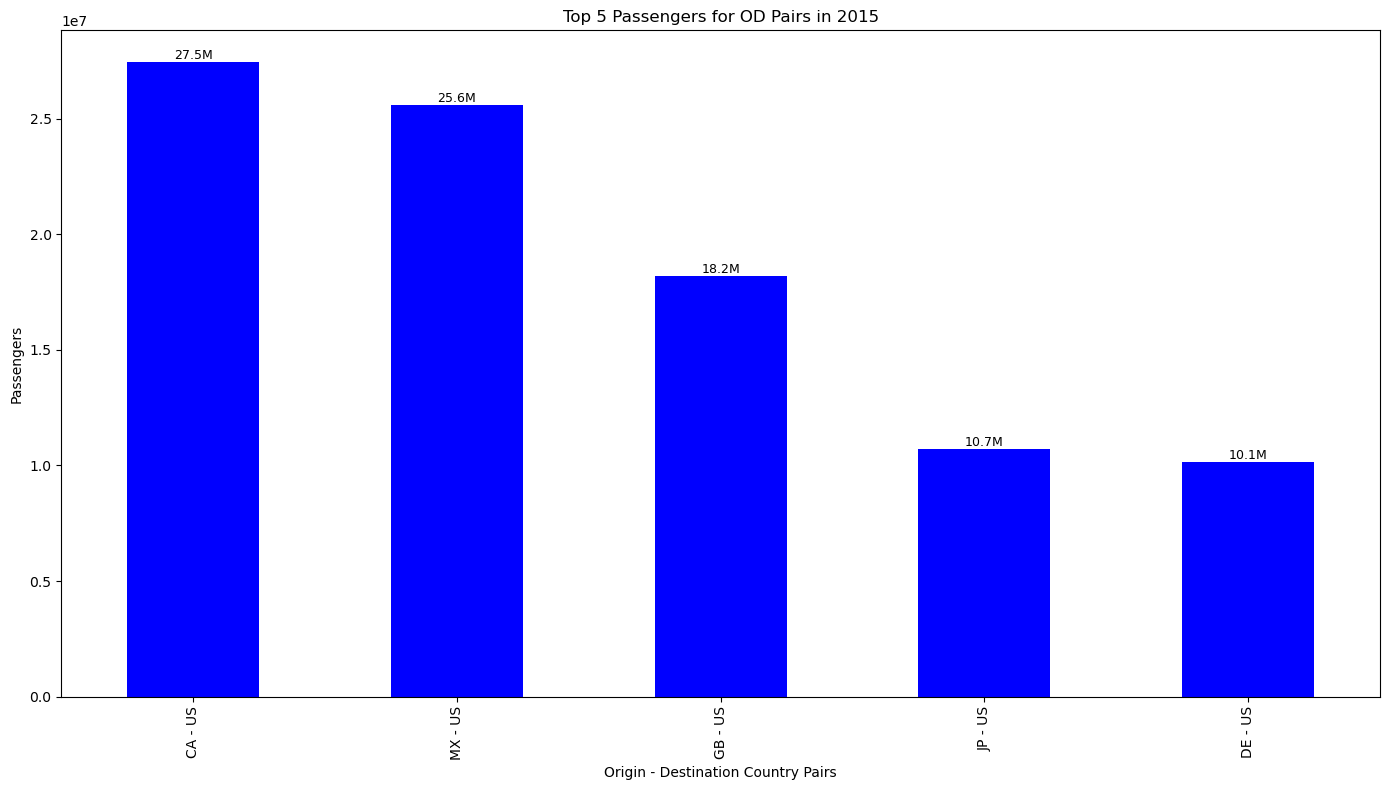

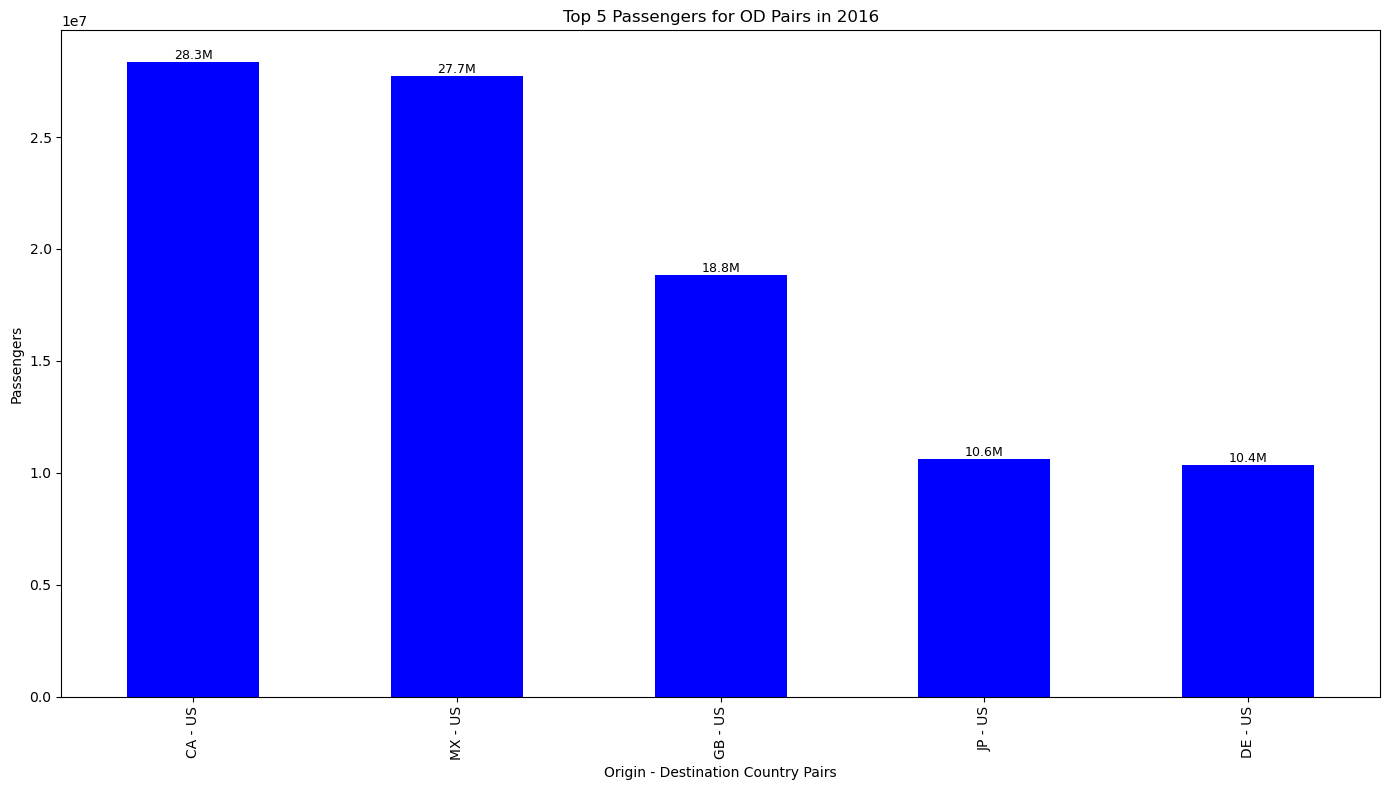

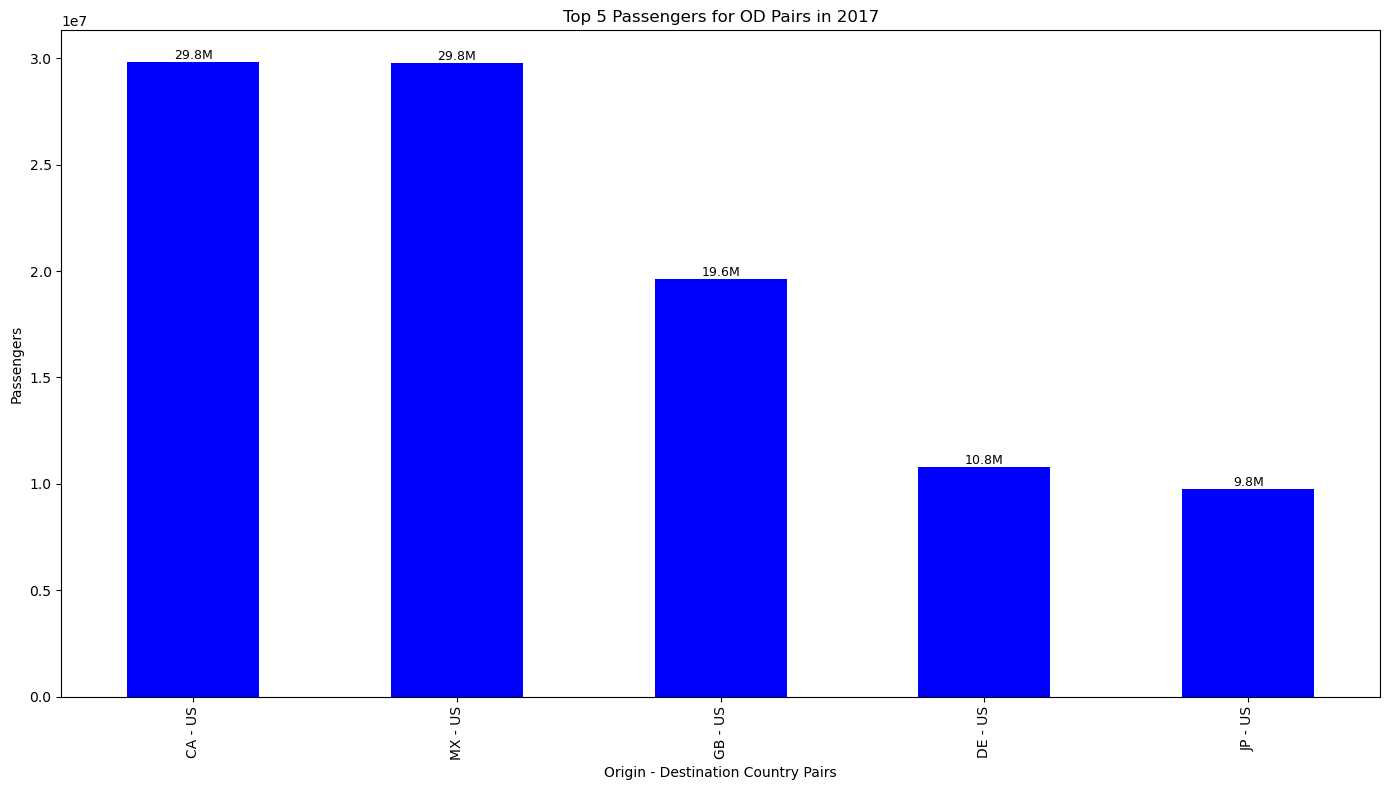

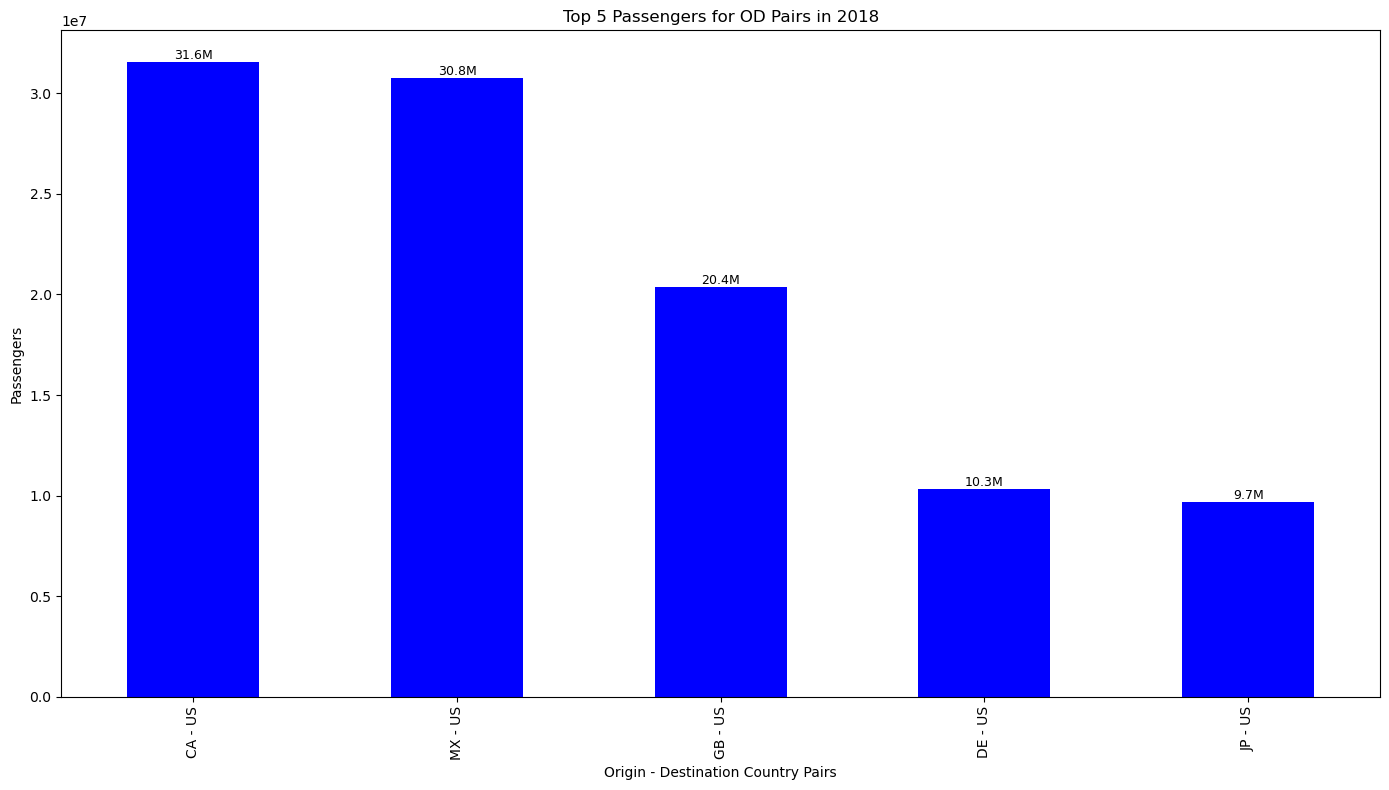

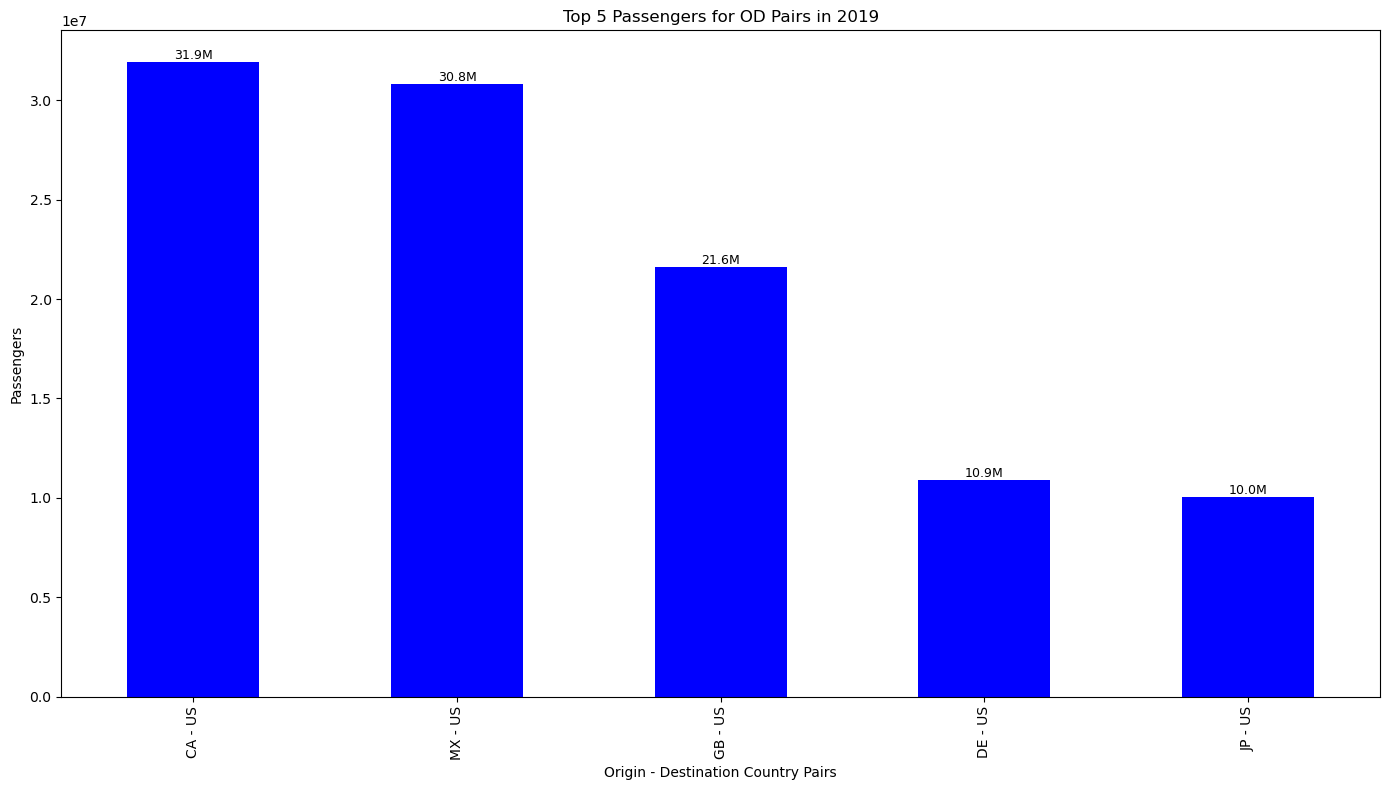

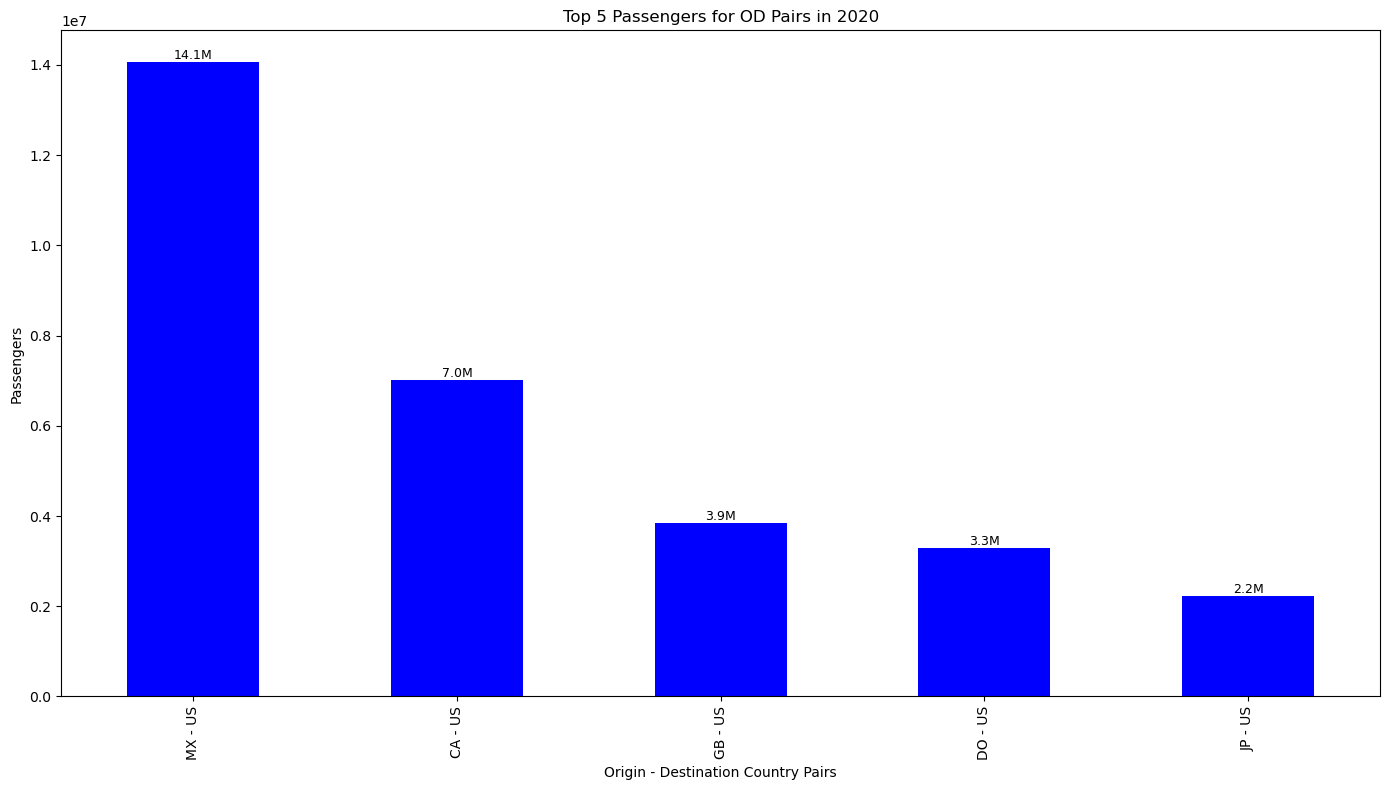

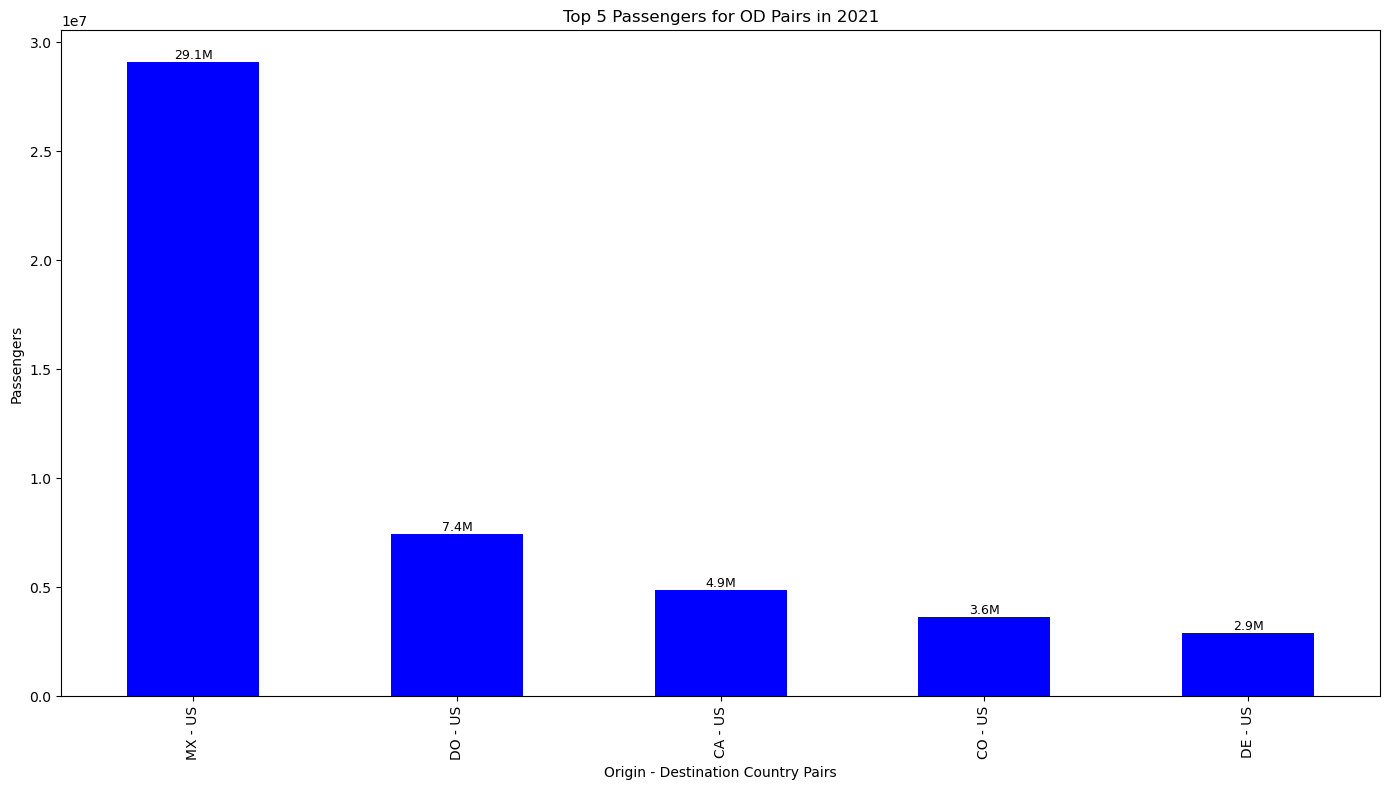

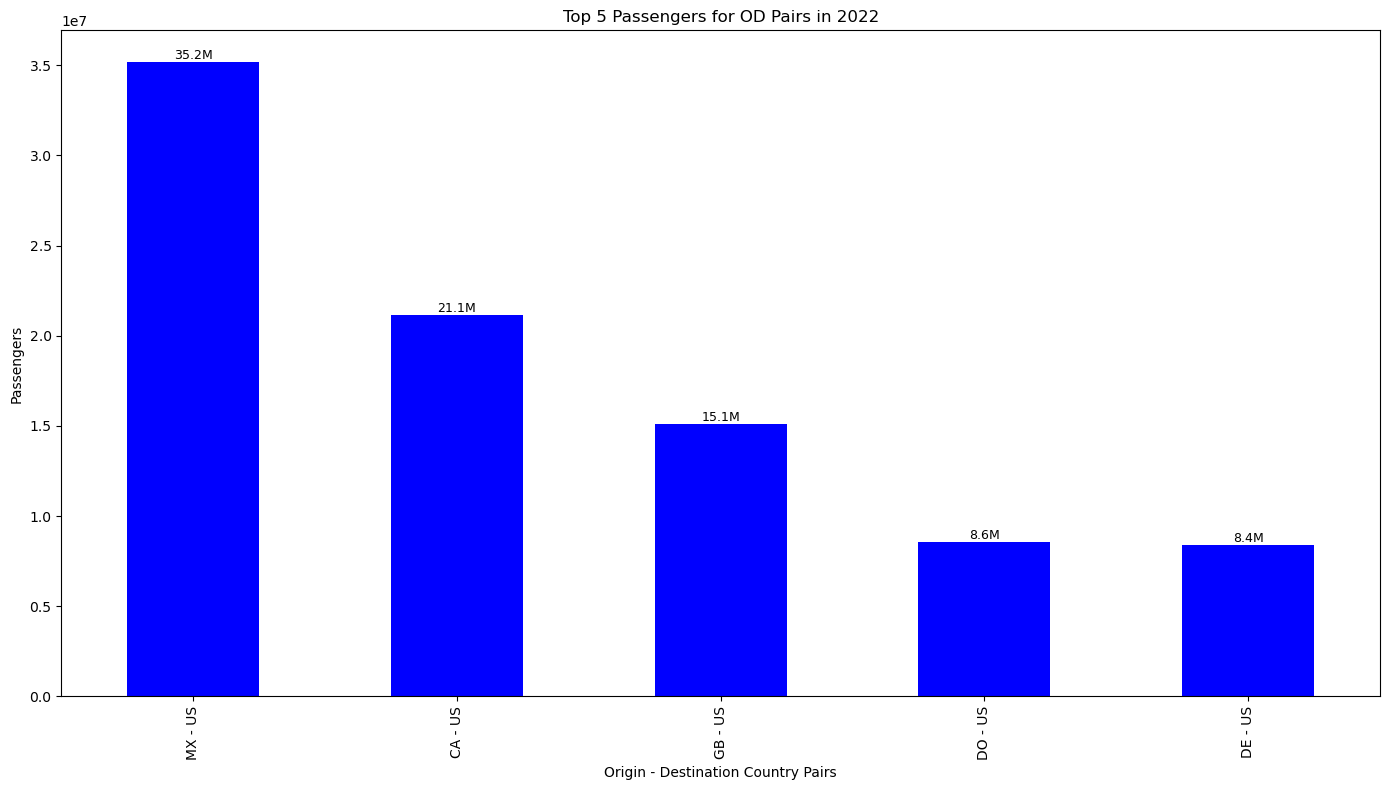

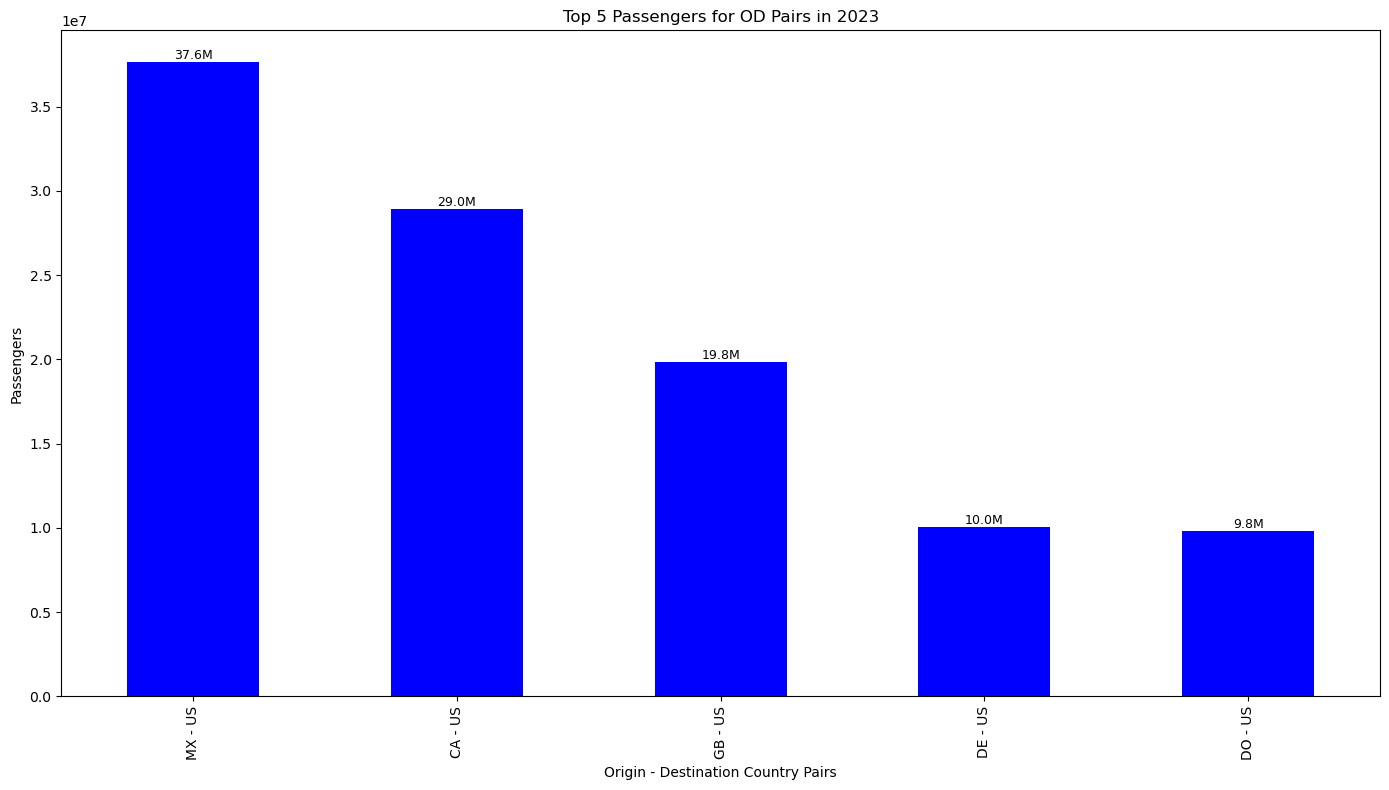

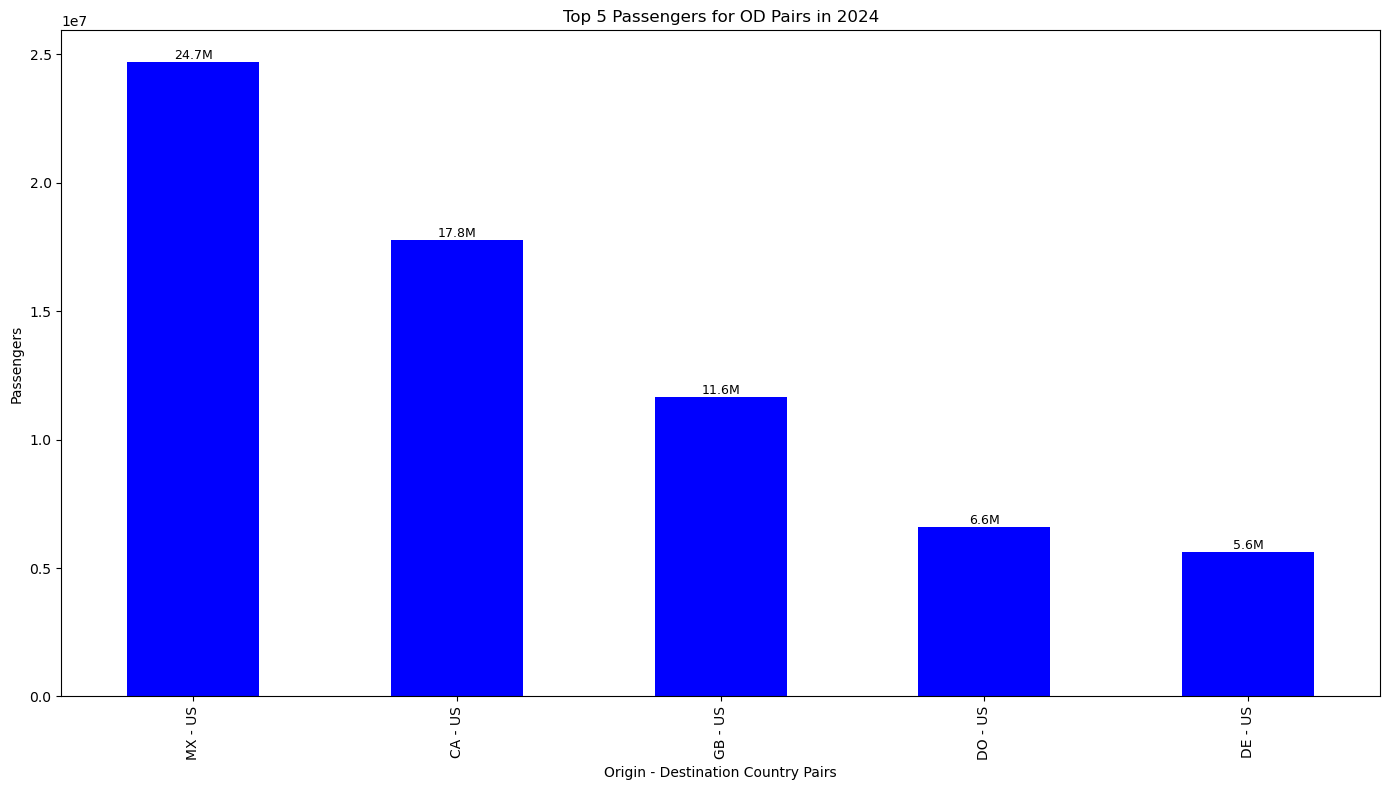

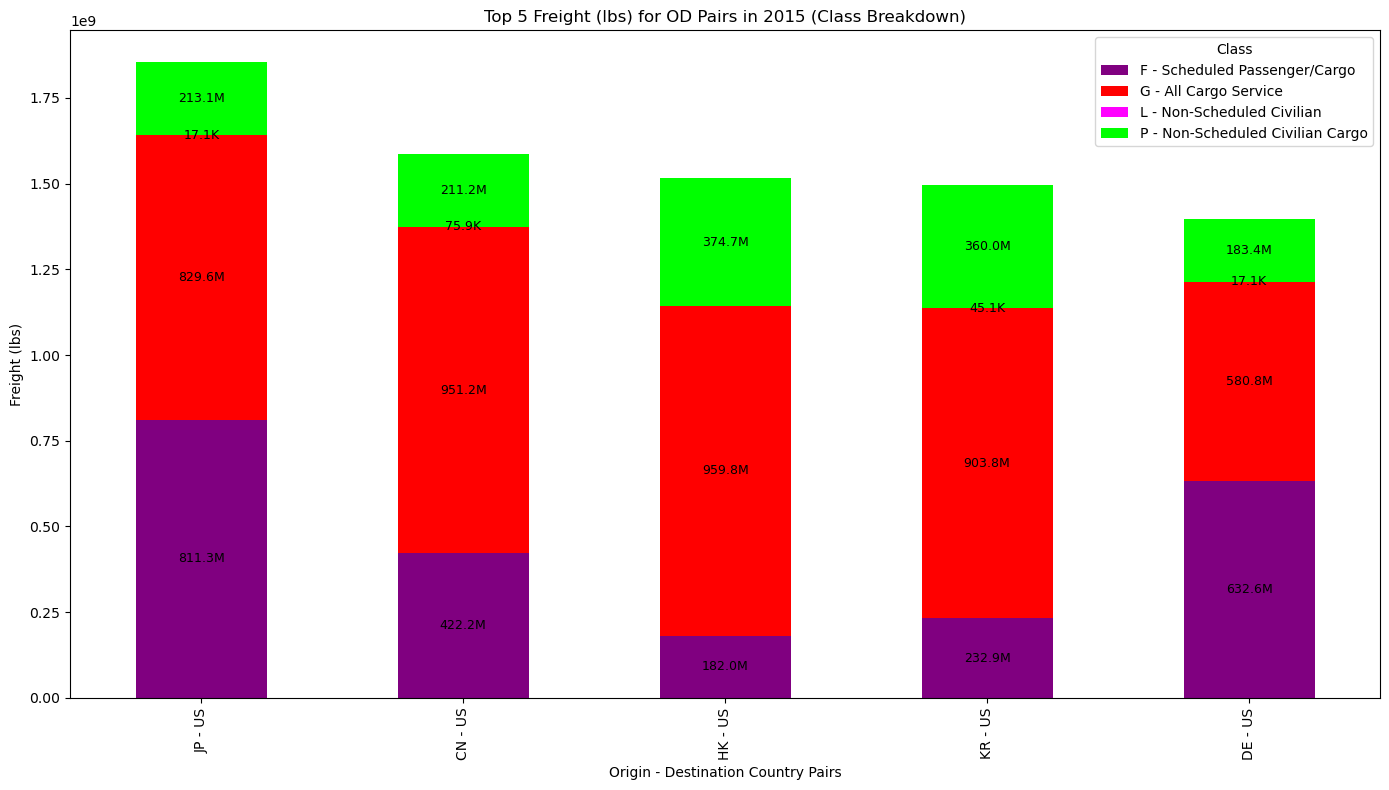

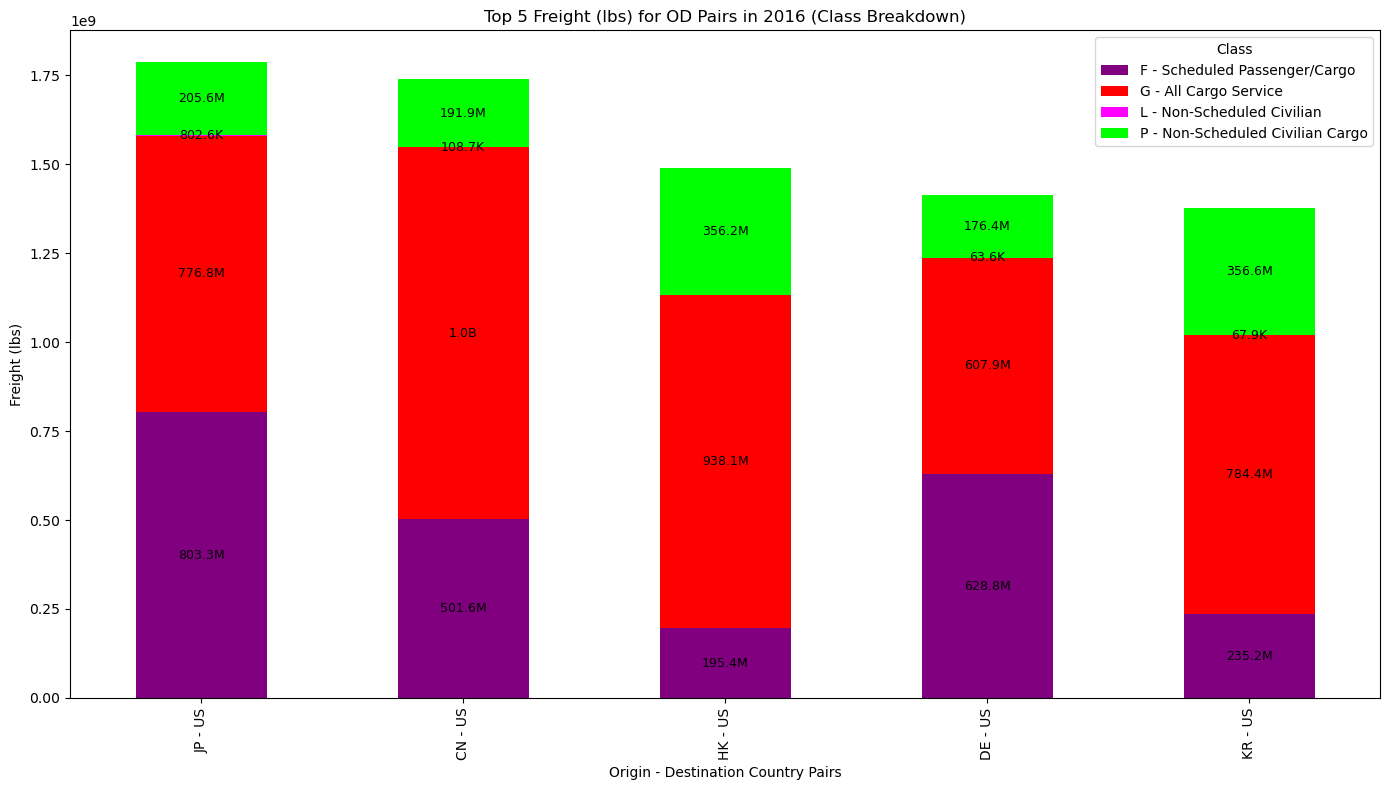

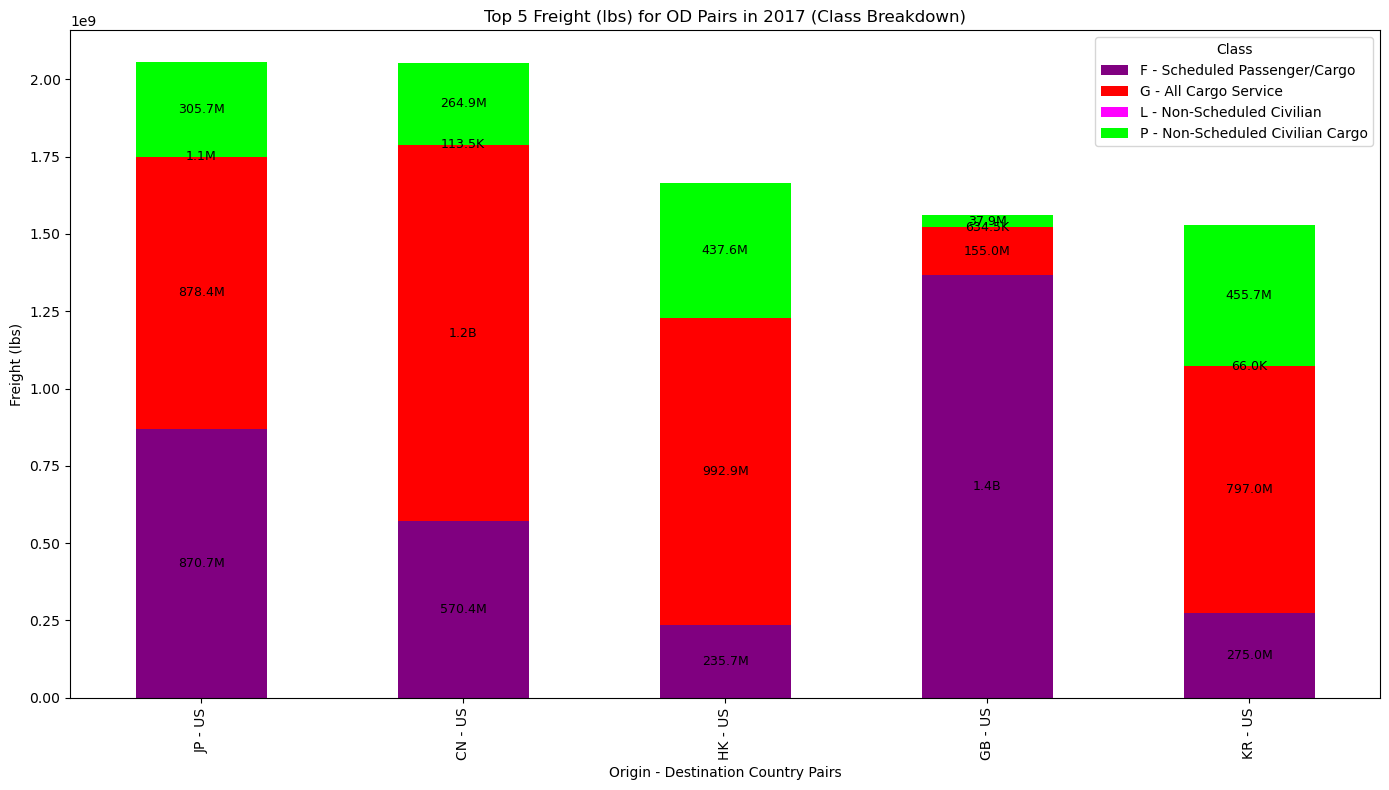

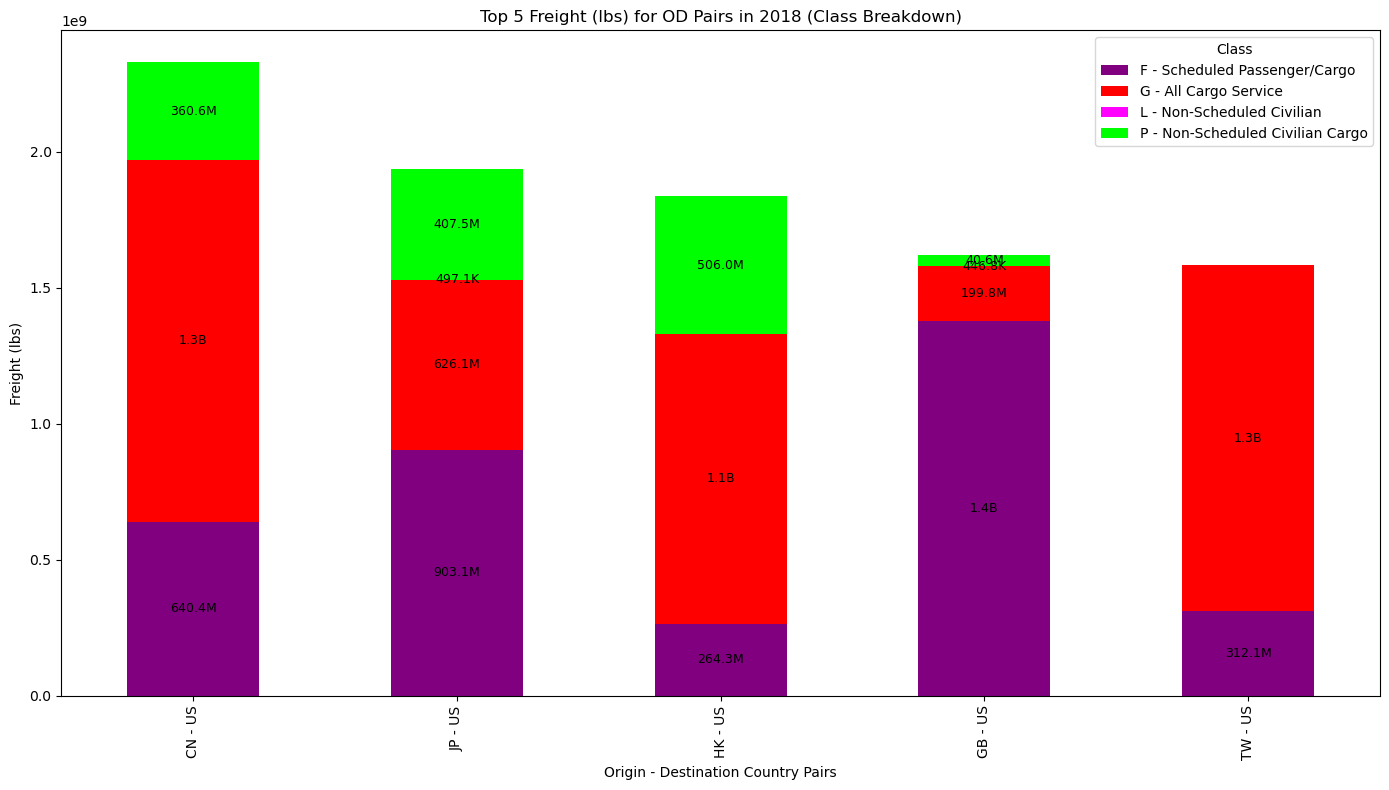

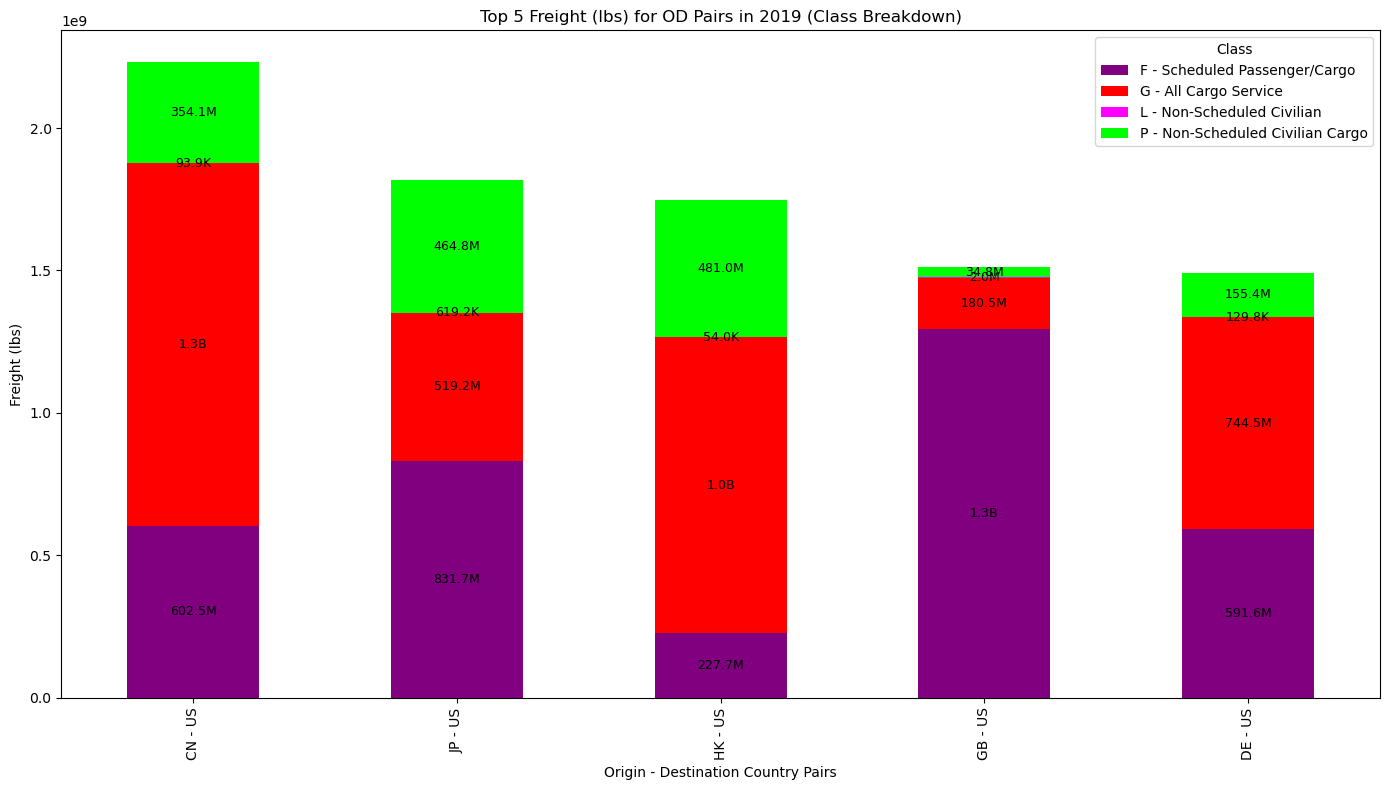

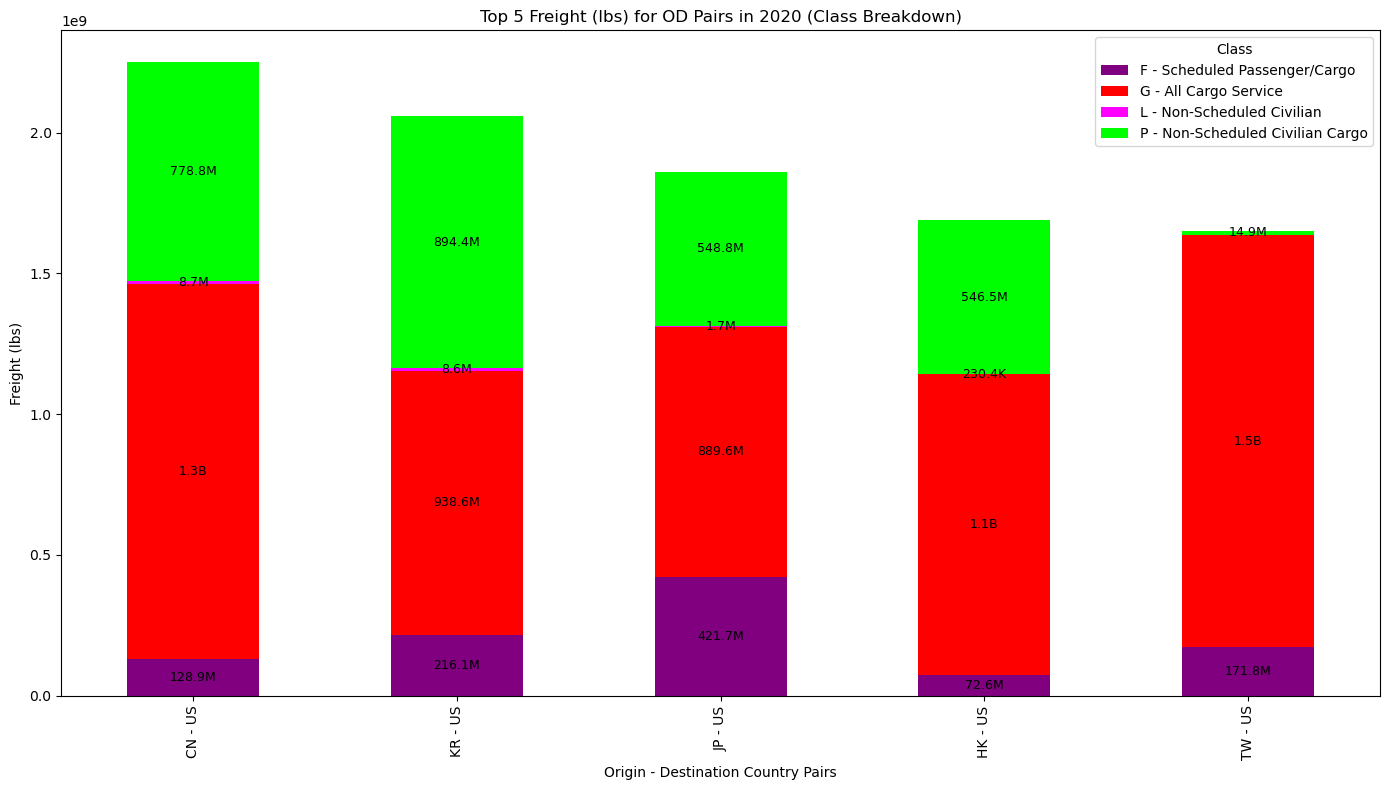

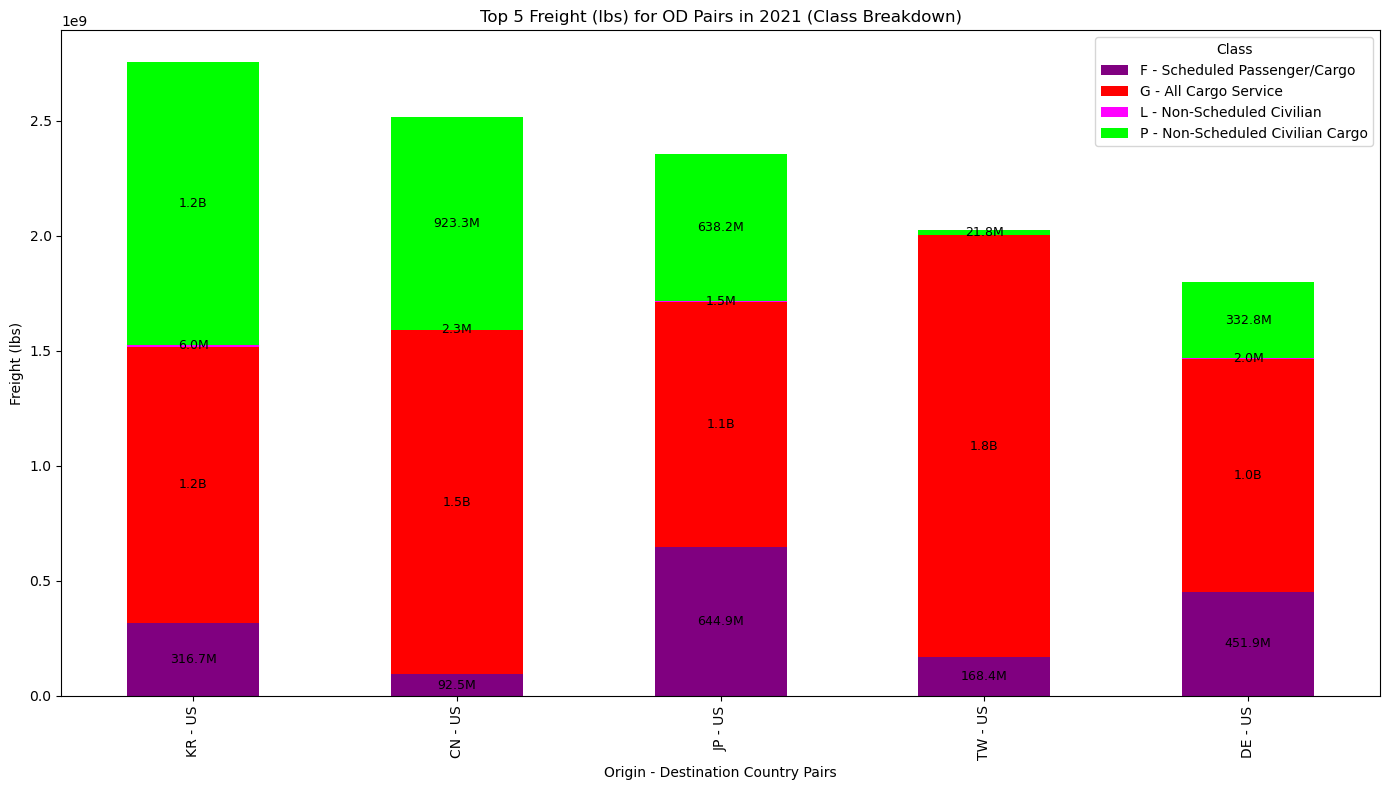

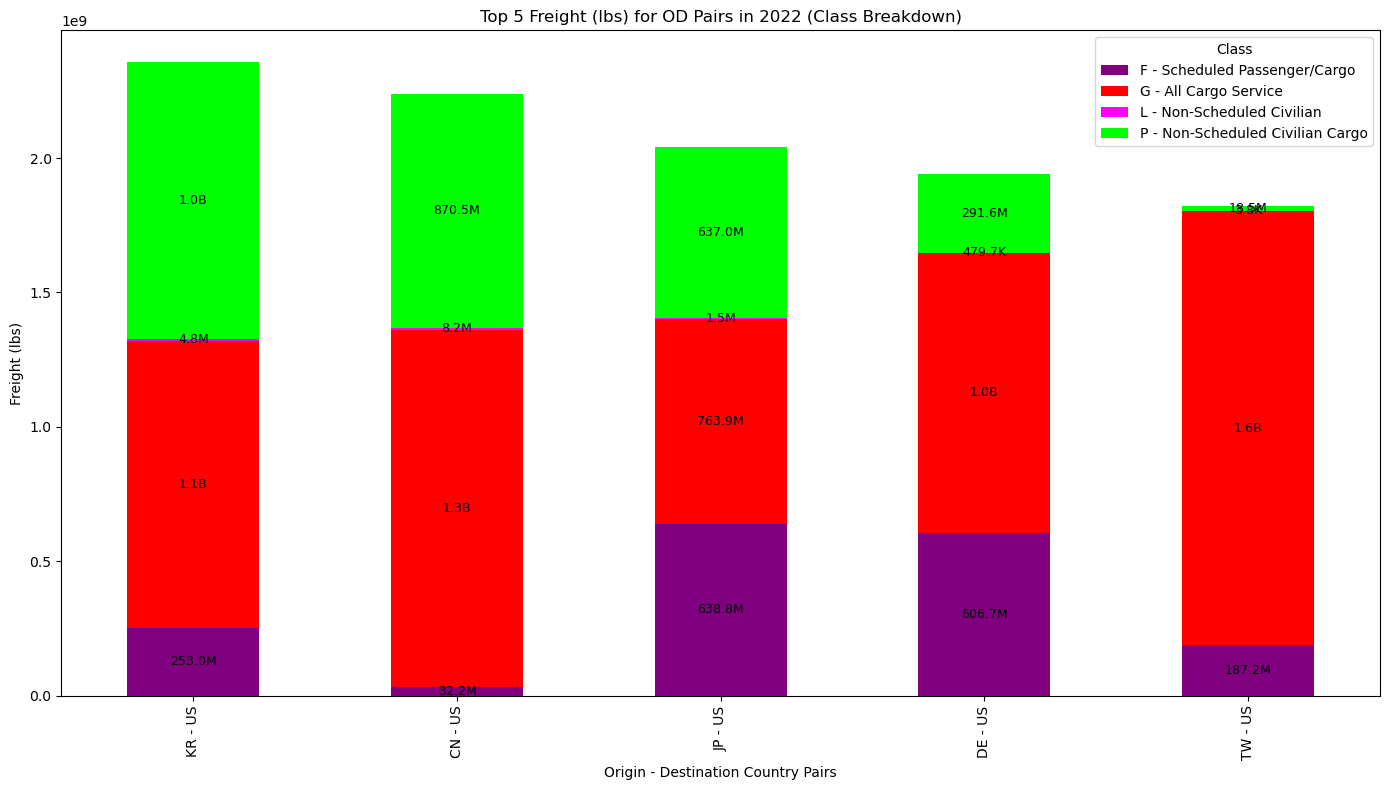

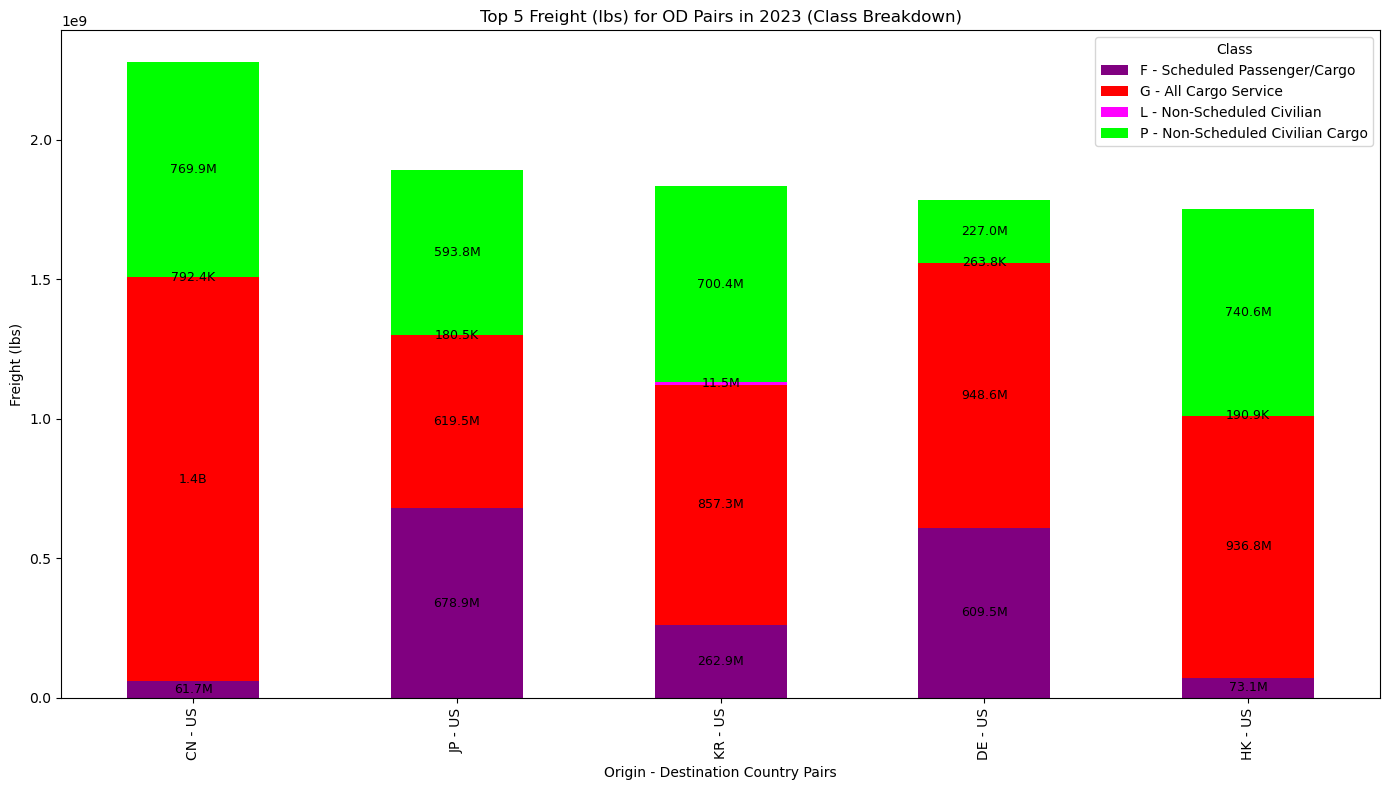

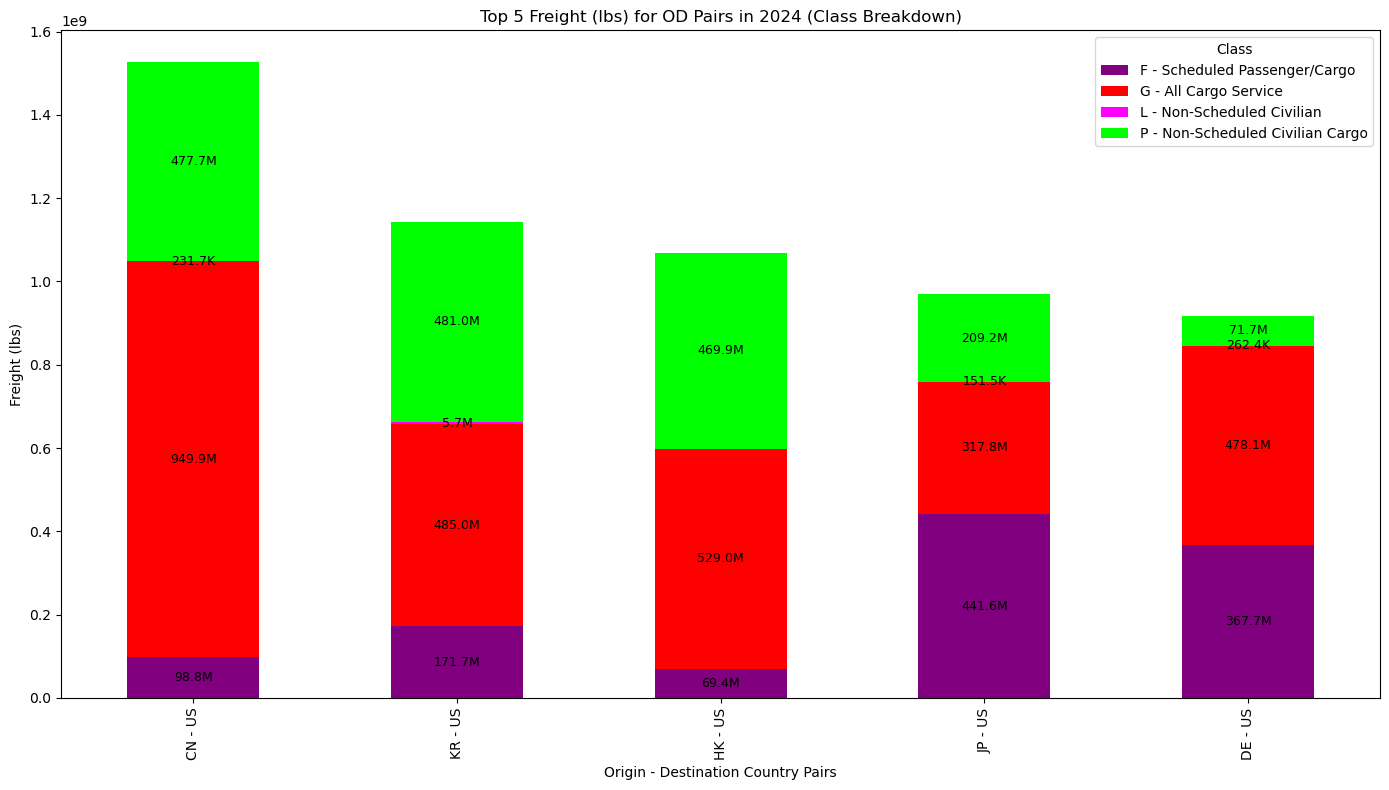

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure your data is properly cleaned and filtered
data = df.dropna(subset=['origin_country', 'dest_country', 'passengers', 'freight', 'year', 'class']).copy()

# Safely create a consistent representation for origin-destination pairs
data['od_pair'] = data.apply(lambda x: ' - '.join(sorted([x['origin_country'], x['dest_country']])), axis=1)

# Group data by the new origin-destination pair, year, and class to sum passengers and freight
grouped_data = data.groupby(['year', 'od_pair', 'class'])[['passengers', 'freight']].sum().reset_index()

# Class descriptions for labeling
class_descriptions = {
    'A': 'Scheduled First Class',
    'C': 'Scheduled Coach',
    'E': 'Mixed First & Coach',
    'F': 'Scheduled Passenger/Cargo',
    'G': 'All Cargo Service',
    'H': 'Humane Reason Unscheduled',
    'K': 'Scheduled Service K',
    'L': 'Non-Scheduled Civilian',
    'N': 'Non-Scheduled Military',
    'P': 'Non-Scheduled Civilian Cargo',
    'Q': 'Non-Scheduled Other Services',
    'R': 'Non-Scheduled Military Cargo',
    'V': 'Non-Scheduled Service V',
    'Z': 'All Services Z'
}

# Function to format numbers as shortened strings
def format_number(num):
    if num >= 1_000_000_000:
        return f'{num / 1_000_000_000:.1f}B'
    elif num >= 1_000_000:
        return f'{num / 1_000_000:.1f}M'
    elif num >= 1_000:
        return f'{num / 1_000:.1f}K'
    else:
        return str(num)

# Function to plot passenger data for the top 5 OD pairs per year
def plot_top_5_passenger_per_year(data, column, title, color,save_path):
    unique_years = sorted(data['year'].unique())

    for year in unique_years:
        year_data = data[data['year'] == year]

        # Get the top 5 OD pairs for this year based on the column
        top_5_od_pairs = (
            year_data.groupby('od_pair')[column]
            .sum()
            .sort_values(ascending=False)
            .head(5)
            .index
        )
        
        # Filter the year data to include only the top 5 pairs
        year_data = year_data[year_data['od_pair'].isin(top_5_od_pairs)]

        fig, ax = plt.subplots(figsize=(14, 8))
        year_data_grouped = year_data.groupby('od_pair')[column].sum().sort_values(ascending=False)
        year_data_grouped.plot(kind='bar', ax=ax, color=color)

        # Add numbers on the bars, formatted as shortened strings
        for bar in ax.patches:
            height = bar.get_height()
            ax.text(bar.get_x() + bar.get_width() / 2, height, format_number(height), ha='center', va='bottom', fontsize=9, color='black')

        ax.set_title(f"Top 5 {title} for OD Pairs in {year}")
        ax.set_xlabel('Origin - Destination Country Pairs')
        ax.set_ylabel(title)

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()

# Function to plot freight data for the top 5 OD pairs per year with class breakdowns
def plot_freight_with_classes_per_year(data, column, title, class_colors,save_path):
    unique_years = sorted(data['year'].unique())

    for year in unique_years:
        year_data = data[data['year'] == year]

        # Get the top 5 OD pairs for this year based on the total freight
        top_5_od_pairs = (
            year_data.groupby('od_pair')[column]
            .sum()
            .sort_values(ascending=False)
            .head(5)
            .index
        )
        
        # Filter the year data to include only the top 5 pairs
        year_data = year_data[year_data['od_pair'].isin(top_5_od_pairs)]

        fig, ax = plt.subplots(figsize=(14, 8))

        # Create a pivot table to show classes as stacks
        pivot_data = year_data.pivot_table(index='od_pair', columns='class', values=column, aggfunc='sum').fillna(0)
        pivot_data['Total'] = pivot_data.sum(axis=1)
        pivot_data = pivot_data.sort_values(by='Total', ascending=False).drop(columns='Total')

        # Plot stacked bars
        pivot_data.plot(kind='bar', stacked=True, ax=ax, color=[class_colors.get(cls, 'gray') for cls in pivot_data.columns])

        # Add numbers on the bars, formatted as shortened strings
        for container in ax.containers:
            ax.bar_label(container, labels=[format_number(v) if v > 0 else '' for v in container.datavalues], label_type='center', fontsize=9, color='black')

        ax.set_title(f"Top 5 {title} for OD Pairs in {year} (Class Breakdown)")
        ax.set_xlabel('Origin - Destination Country Pairs')
        ax.set_ylabel(title)
        ax.legend([f"{cls} - {class_descriptions.get(cls, 'Unknown')}" for cls in pivot_data.columns], title='Class')

        plt.tight_layout()
        plt.savefig(save_path)
        plt.show()

# Define colors for different classes (ensure these are valid color strings)
class_colors = {
    'A': 'blue',
    'C': 'green',
    'E': 'orange',
    'F': 'purple',
    'G': 'red',
    'H': 'brown',
    'K': 'cyan',
    'L': 'magenta',
    'N': 'yellow',
    'P': 'lime',
    'Q': 'pink',
    'R': 'teal',
    'V': 'navy',
    'Z': 'olive'
}

# Plot for Passengers for the top 5 OD pairs per year
plot_top_5_passenger_per_year(grouped_data, 'passengers', 'Passengers', 'blue','../pics/top_5_passenger_country_pairs.png')

# Plot for Freight for the top 5 OD pairs per year with class breakdowns
plot_freight_with_classes_per_year(grouped_data, 'freight', 'Freight (lbs)',class_colors,'../pics/top_5_freight_country_pairs.png')